<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2022/23 Term 2
</div>

# CS105 Group Project Submission (Final)

-----
<img src="attachment:info.png" width="60" align="left"/>Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

#### Section: G4 
#### Team: Group 5
#### Members:
1. Chew Hui Feng
2. Eric Ng Yong Wei
3. Colin Teo Jun Wei
4. Tan Li Yang Samuel
5. Martin Ong Yan Jie

#### Dataset: Credit Dataset

### Importing libraries

We will begin by importing all the important libraries needed to carry out any data analysis. This includes
- Numpy: For sorting and type casting
- Pandas: For DataFrame and many functions associated to it
- Matplotlib: For pyplot which will be useful for visualization of data through generation of graphs.
- Seaborn: For more visualization

In [1]:
# General libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will load the dataset from the CSV file.

In [2]:
# Loading dataset 
df = pd.read_csv('Data Files\credit.csv') 

Finally, for ease of viewing of the data when using panda's DataFrame, we will set `display.max_columns` to `None` so that we can view all the different columns

In [3]:
# set pandas to display all columns
pd.set_option('display.max_columns', None)

# Part I: Exploratory Data Analysis (EDA) [8% of final grade]

## 1. Overview of dataset [15% of Part I]

### **a.** Summarise the background of the dataset [limited to 50 words]

The dataset mainly specifies various information about past applicants for a credit facility in a bank. The information also includes the approval status of each applicant as well as features that might or might not be be part of the deciding factor that contributes to approval of credit.

### **b.** State the size of the dataset

The following code prints out the number of rows and columns in the dataset before we clean or perform statistical inference out of the data

In [4]:
num_rows, num_cols = df.shape
print(f'# of rows: {num_rows}')
print(f'# of columns: {num_cols}')

# of rows: 1000
# of columns: 23


We proceed by discovering what are the available columns so that we can further understand what our dataset is about

In [5]:
print("These are the columns in the dataset:")
df.columns

These are the columns in the dataset:


Index(['ID', 'Checking_Account', 'Duration', 'Payment_Status', 'Purpose',
       'Amount', 'Savings_Account', 'Employment', 'Installment',
       'Personal_Status', 'Guarantors', 'Residence_Length', 'Assets', 'Age',
       'Credit_Rating', 'Existing_Credits', 'Housing_Type', 'Num_Credits',
       'Occupation', 'Dependents', 'Telephone', 'Foreign_Worker', 'Approval'],
      dtype='object')

### **c.** For each variable, describe what it represents and its data type (numerical or categorical)

In order to understand what does each variable represents, we begin by viewing the first 10 rows of the dataset to get an idea about how a few rows of the data looked like

In [6]:
df.head(10)

,ID,Checking_Account,Duration,Payment_Status,Purpose,Amount,Savings_Account,Employment,Installment,Personal_Status,Guarantors,Residence_Length,Assets,Age,Credit_Rating,Existing_Credits,Housing_Type,Num_Credits,Occupation,Dependents,Telephone,Foreign_Worker,Approval
0,1,1,24,2,0,1442,1,4,4,2,1,4.0,3,23,4,3,1,2.0,3,1,1,1,0
1,2,4,24,2,3,1413,1,3,4,4,1,2.0,2,28,59,3,2,1.0,3,1,1,1,1
2,3,1,12,2,3,2214,1,3,4,3,1,3.0,2,24,26,3,2,1.0,2,1,1,1,1
3,4,1,30,2,2,3108,1,2,2,1,1,4.0,2,31,26,3,2,1.0,2,1,1,1,0
4,5,4,54,0,1,9436,5,3,2,3,1,2.0,2,39,97,3,2,1.0,2,2,1,1,1
5,6,2,36,1,4,3990,5,2,3,2,1,2.0,4,29,19,1,2,1.0,1,1,1,1,1
6,7,2,48,2,3,10961,4,4,1,3,2,2.0,4,27,19,1,2,2.0,3,1,2,1,0
7,8,1,12,4,0,2171,1,3,4,3,1,4.0,2,38,98,1,2,2.0,2,1,1,2,1
8,9,1,24,2,2,1747,1,2,4,3,2,1.0,2,24,92,3,2,1.0,2,1,1,2,1
9,10,2,30,1,2,3496,4,3,4,3,1,2.0,3,34,72,2,2,1.0,3,2,2,1,1


We then proceed to print out their datatypes to check if any of them are being encoded incorrectly and also further understand the datatypes used for each column

In [7]:
df.dtypes

ID                    int64
Checking_Account      int64
Duration              int64
Payment_Status        int64
Purpose               int64
Amount                int64
Savings_Account       int64
Employment            int64
Installment           int64
Personal_Status       int64
Guarantors            int64
Residence_Length    float64
Assets                int64
Age                   int64
Credit_Rating         int64
Existing_Credits      int64
Housing_Type          int64
Num_Credits         float64
Occupation            int64
Dependents            int64
Telephone             int64
Foreign_Worker        int64
Approval              int64
dtype: object

As we can observe through the datatypes above, there are some issues such as `Residence_Length` and `Num_Credits` being typed as `float64` despite them being a categorical typed data that has should be `int64`.

Since `df.dtypes` does not accurately reflect whether the column datatype is numerical or categorical, hence we will use data dictionary for our "credit" dataset

<table> 
    <tr>
        <th> Column Name </th>
        <th> Explanation </th>
        <th> Datatype </th>
        <th> Expected Values </th>
        <th> Numerical/Categorical </th>
        <th> Details </th>
    </tr>
    <tr>
        <td> ID </td>
        <td> Unique id of an applicant </td>
        <td> Integer </td>
        <td> 1 to #rows </td>
        <td> Categorical </td>
        <td> - </td>
    </tr>
    <tr>
        <td> Checking_Account </td>
        <td> Status of checking account 1</td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
        <td>  1: \$0<br /> 2: < \$200 <br /> 3: > \$200 <br /> 4: no checking account </td>
    </tr>
    <tr>
        <td> Duration </td>
        <td> Credit duration in months </td>
        <td> Integer </td>
        <td> Positive Integer value </td>
        <td> Numerical </td>
        <td> - </td>    
    </tr>
    <tr>
        <td> Payment_Status </td>
        <td> Credit history of an applicant </td>
        <td> Integer </td>
        <td> 0 to 4</td>
        <td> Categorical </td>
        <td> 0: no credits taken <br / >
            1: all credits paid back <br / >
            2: existing credits paid back till now <br / >
            3: delay in paying off in the past <br / >
            4: critical account <br / >
     </td>
    </tr>
    <tr>
        <td> Purpose </td>
        <td> Type of purpose for applying credit </td>
        <td> Integer </td>
        <td> 0 to 10 </td>
        <td> Categorical </td>
        <td> 0: car (new) <br />
            1: car (used) <br />
            2: furniture/equipment <br /> 3: radio/television <br />
            4: domestic appliances <br /> 5: repairs <br />
            6: education <br /> 7: vacation <br /> 8: retraining <br />
            9: business <br /> 10: others
        </td>
    </tr>
    <tr>
        <td> Amount </td>
        <td> Amount of credit applying for </td>
        <td> Integer </td>
        <td> Integer value </td>
        <td> Numerical </td>
        <td> - </td>
    </tr>
     <tr>
        <td> Savings_Account </td>
        <td> Status type of savings account </td>
        <td> Integer </td>
        <td> 1 to 5 </td>
        <td> Categorical </td>
        <td> 1: < \$100 <br /> 2: \$100 - \$500 <br />
            3: \$500 - \$1000 <br /> 4: > \$3000 <br />
            5: unknown/no savings account
        </td>
    </tr>
    <tr>
        <td> Employment </td>
        <td> Length of current employment </td>
        <td> Integer </td>
        <td> 1 to 5 </td>
        <td> Categorical </td>
        <td> 1: unemployed <br /> 2: < 1 year <br />
            3: 1 - 4 years <br /> 4: 4 - 7 years <br /> 5: > 7 years
        </td>
    </tr>
    <tr>
        <td> Installment </td>
        <td> Installment rate as percentage of disposable income </td>
        <td> Integer </td>
        <td> Integer value </td>
        <td> Numerical </td>
        <td> - </td>
    </tr>
    <tr>
        <td> Personal_Status </td>
        <td> Marital status and sex </td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
        <td> 1: male, divorced/separated <br />
            2: male, single <br />
            3: male, married/widowed <br />
            4: female </td>
    </tr>
    <tr>
        <td> Guarantors </td>
        <td> If other debtors or guarantor exists </td>
        <td> Integer </td>
        <td> 1 to 3 </td>
        <td> Categorical </td>
        <td> 1: none <br /> 
            2: co-applicant <br /> 3: guarantor 
        </td>
    </tr>
    <tr>
        <td> Residence_Length </td>
        <td> Length of staying in current residence </td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
        <td> 1: < 1 year <br /> 2: 1 - 2 years <br /> 3: 2 - 3 years <br />
            4: > 3 years
        </td>
    </tr>
    <tr>
        <td> Assets </td>
        <td> Asset ownership type</td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
        <td> 1: real estate <br />
2: savings agreement/life insurance (if no 1) <br />
3: car or other (if no 1, 2) <br /> 4: unknown/none
        </td>
    </tr>
    <tr>
        <td> Age </td>
        <td> Age of applicant in years </td>
        <td> Integer </td>
        <td> Positive integer value </td>
        <td> Numerical </td>
        <td> - </td>
    </tr>
    <tr>
        <td> Credit_Rating </td>
        <td> Credit rating of applicant </td>
        <td> Integer </td>
        <td> 1 to 100 </td>
        <td> Numerical </td>
        <td> Value between 1 and 100 </td>
    </tr>
    <tr>
        <td> Existing_Credit </td>
        <td> Other existing credit in places and what type </td>
        <td> Integer </td>
        <td> 1 to 3 </td>
        <td> Categorical </td>
        <td> 1: bank<br/>2: stores<br/>3: none </td>
    </tr>
    <tr>
        <td> Housing_Type </td>
        <td> Type of apartment </td>
        <td> Integer </td>
        <td> 1 to 3 </td>
        <td> Categorical </td>
        <td> 1: rent<br/>2: own<br/>3: for free </td>
    </tr>
    <tr>
        <td> Num_Credits </td>
        <td> Number of existing credits </td>
        <td> Integer </td>
        <td> Integer value </td>
        <td> Numerical </td>
        <td> - </td>
    </tr>
    <tr>
        <td> Occupation </td>
        <td> Occupation type </td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
        <td> 1 : unemployed/ unskilled - non-resident<br/>2 : unskilled – resident<br/>3 : skilled employee / official<br/>4 : management/ self-employed </td>
    </tr>
    <tr>
        <td> Dependents </td>
        <td> Number of dependents of applicant </td>
        <td> Integer </td>
        <td> Integer value </td>
        <td> Numerical </td>
        <td> - </td>
    </tr>
    <tr>
        <td> Telephone </td>
        <td> Has telephone or not </td>
        <td> Integer </td>
        <td> 1, 2 </td>
        <td> Categorical </td>
        <td> 1: none<br/>2: yes, registered to customer </td> 
    </tr>
    <tr>
        <td> Foreign_Worker </td>
        <td> Foreign worker or not </td>
        <td> Integer </td>
        <td> 1, 2 </td>
        <td> Categorical </td>
        <td>1: yes<br/>2: no </td>
    </tr>
    <tr>
        <td> Approval </td>
        <td> Loan approval status, 1 is approved, 2 is not approved </td>
        <td> Integer </td>
        <td> 0, 1 </td>
        <td> Categorical </td>
        <td> 1: approved<br/>0: not approved </td>
    </tr>
        
</table>

## 2. Data pre-processing [35% of Part I]

### **a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

We begin by discovering the count of each column to ensure that all of them has the same count as the whole dataset, which is 1000

In [8]:
print("Number of data in each column: ")
df.count()

Number of data in each column: 


ID                  1000
Checking_Account    1000
Duration            1000
Payment_Status      1000
Purpose             1000
Amount              1000
Savings_Account     1000
Employment          1000
Installment         1000
Personal_Status     1000
Guarantors          1000
Residence_Length     966
Assets              1000
Age                 1000
Credit_Rating       1000
Existing_Credits    1000
Housing_Type        1000
Num_Credits          969
Occupation          1000
Dependents          1000
Telephone           1000
Foreign_Worker      1000
Approval            1000
dtype: int64

From the code above, we notice that there are two columns with missing data which are `Residence_Length` and `Num_Credits`. Therefore, we proceed to discover the percentage of data that is not missing to have a rough idea on how much are the data missing in both columns

In [9]:
print("Percentage of data that is not missing: ")
df.count() / num_rows 

Percentage of data that is not missing: 


ID                  1.000
Checking_Account    1.000
Duration            1.000
Payment_Status      1.000
Purpose             1.000
Amount              1.000
Savings_Account     1.000
Employment          1.000
Installment         1.000
Personal_Status     1.000
Guarantors          1.000
Residence_Length    0.966
Assets              1.000
Age                 1.000
Credit_Rating       1.000
Existing_Credits    1.000
Housing_Type        1.000
Num_Credits         0.969
Occupation          1.000
Dependents          1.000
Telephone           1.000
Foreign_Worker      1.000
Approval            1.000
dtype: float64

From the code above and below, both `Residence_Length` and `Num_Credits` have less than 5% missing data

In [10]:
print("Number of missing data in each column: ")
df.isna().sum()

Number of missing data in each column: 


ID                   0
Checking_Account     0
Duration             0
Payment_Status       0
Purpose              0
Amount               0
Savings_Account      0
Employment           0
Installment          0
Personal_Status      0
Guarantors           0
Residence_Length    34
Assets               0
Age                  0
Credit_Rating        0
Existing_Credits     0
Housing_Type         0
Num_Credits         31
Occupation           0
Dependents           0
Telephone            0
Foreign_Worker       0
Approval             0
dtype: int64

Based on the output above
- `Residence_Length` have 34 rows missing data <br>
- `Num_Credits` have 31 rows of missing data

In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df [missing_value_df ['percent_missing'] !=0]

,column_name,percent_missing
Residence_Length,Residence_Length,3.4
Num_Credits,Num_Credits,3.1


Now let's take a look at actual percentage of data missing from these two rows <br>
`Residence_Length` have 3.4% missing data and `Num_Credits` have 3.1% missing data which are not too much of them missing, hence it is not a wise move to drop the whole column.

To decide what we will do to the rows with missing data for both columns, we will have a look at what are the existing data

#### `Num_Credits` column - missing data

In [12]:
df['Num_Credits'].value_counts()

1.0    615
2.0    321
3.0     27
4.0      6
Name: Num_Credits, dtype: int64

In [13]:
df['Num_Credits'] = df['Num_Credits'].fillna(0)
df['Num_Credits'].value_counts()

1.0    615
2.0    321
0.0     31
3.0     27
4.0      6
Name: Num_Credits, dtype: int64

Based on the description and the existing data provided for this field `Num_Credits` shows the number of existing credits for an applicant. We can see that there are no cases where the applicants don't have any existing credits which is the value 0 or its equivalent as shown above, but we have values 1, 2, 3, 4. 

However, it is very unlikely in 1000 applicants of credit, there aren't any of them that does not have any credits at the moment. Therefore, our team make an assumption such that those rows that don't specify the number of credits they hold were the applicants who do not have any existing credits. 

This makes sense to us since the NaN in this case is likely serving as an alternative to represent 0. In the real world scenario, we should clarify with people who collected these data or manually survey with the customer's data. However, due to the limitations of our project, we are unable to do so and hence, we will **assume** it. 

With that, we will fill all the Nan values for `Num_Credits` with the numerical value 0, to fit the datatype of the column and indicate applicants with no existing credits

#### `Residence_Length` column - missing data

In [14]:
df['Residence_Length'].value_counts()

4.0    397
2.0    288
3.0    145
1.0    125
5.0     11
Name: Residence_Length, dtype: int64

On the other hand, there seems to be no reasonable way for us to impute the missing data for `Residence_Length`. 

- `Residence_Length` value is completely random and we cannot assume a value for it as doing so will increase the noise within this dataset and possibly decrease the accuracy of our statistical summaries or trained models.

Therefore, the best move we can make is to remove all rows that contains null values for `Residence_Length` column and since the missing data only take up less than 5% of the whole dataset which is a very small percentage.

In [15]:
df = df[df['Residence_Length'].notna()]
num_rows = df.shape[0]

We make a final check to ensure that the rows are being dropped and counter check the number of rows remaining in the dataset

In [16]:
print('After dropping rows: ')
print(f'# of rows: {num_rows}')
print(f'# of columns: {num_cols}')

After dropping rows: 
# of rows: 966
# of columns: 23


### **b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

Based on the dataset provided we have identified that `Credit_Rating` and `Residence_Length` contains outliers

- There are values where `Credit_Rating` is out of the range of between 1 to 100 (inclusive)
- There are values where `Residence_Length` is out of the range of between 1 to 4 (inclusive)

The following code shows the abnormalities mentioned

#### `Residence_Length` column - outlier

In [17]:
np.sort(df['Residence_Length'].unique())

array([1., 2., 3., 4., 5.])

In [18]:
df['Residence_Length'].value_counts()

4.0    397
2.0    288
3.0    145
1.0    125
5.0     11
Name: Residence_Length, dtype: int64

As we can see `Residence_Length` contains outliers. The accepted values for `Residence_Length` is [1, 2, 3, 4] but there is value '5' in this dataset which is outside the accepted range hence we will have to drop it. There are 11 rows with value '5' for `Residence_Length`

In [19]:
df = df[df['Residence_Length'] != 5]
np.sort(df['Residence_Length'].unique())

array([1., 2., 3., 4.])

#### `Credit_Rating` column - outlier

In [20]:
np.sort(df['Credit_Rating'].unique())

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33,
       34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [21]:
print(f"# of row with 'Credit Rating' as value -1: {df['Credit_Rating'].value_counts()[-1]}")
print(f"# of row with 'Credit Rating' as value 0: {df['Credit_Rating'].value_counts()[0]}")

# of row with 'Credit Rating' as value -1: 1
# of row with 'Credit Rating' as value 0: 3


Similar scenario can be observed again with `Credit_Rating`. The accepted values for `Credit_Rating` is 1 to 100 but there is value '0 and '-1' in this dataset which is outside the accepted range hence we will have to drop it. There are 1 rows with value '-1' and 3 rows with value '0' for `Credit_Rating`

In [22]:
df = df[df['Credit_Rating'] > 0]
np.sort(df['Credit_Rating'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35,
       36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

After cleaning all the abnormalities, we are left with the following number of rows for this dataset

In [23]:
num_rows = df.shape[0]
print(f'# of rows: {num_rows}')

# of rows: 951


After all the data cleaning is done, we are still left with more than 90% of the dataset remaining

### **c.** For categorical variables, perform the necessary encoding.

After the data cleaning done above, we still haven't convert the columns `Residence_Length` and `Num_Credits` to `int64`, as such we will do it now

In [24]:
df["Residence_Length"] = df["Residence_Length"].astype(np.int64)
df["Num_Credits"] = df["Num_Credits"].astype(np.int64)
df.dtypes

ID                  int64
Checking_Account    int64
Duration            int64
Payment_Status      int64
Purpose             int64
Amount              int64
Savings_Account     int64
Employment          int64
Installment         int64
Personal_Status     int64
Guarantors          int64
Residence_Length    int64
Assets              int64
Age                 int64
Credit_Rating       int64
Existing_Credits    int64
Housing_Type        int64
Num_Credits         int64
Occupation          int64
Dependents          int64
Telephone           int64
Foreign_Worker      int64
Approval            int64
dtype: object

Next, we will make a copy of the original dataframe before we perform futher encoding of categorical variables

In [25]:
#Make a copy of original df and encode the new df `df_encoded`
df_encoded = df.copy(deep=True)

#### Categorical Variable Encoding Review


##### 1. `Checking_Account`

In [26]:
df_encoded['Checking_Account'].value_counts()

4    372
2    260
1    258
3     61
Name: Checking_Account, dtype: int64

Since value '4' of `Checking_Account` refers to having no checking account, it should be ranked lower than having one. Therefore, we will replace all of values '4' of `Checking_Account` to '0' instead

In [27]:
df_encoded['Checking_Account'] = df_encoded['Checking_Account'].replace(4, 0)
df_encoded['Checking_Account'].value_counts()

0    372
2    260
1    258
3     61
Name: Checking_Account, dtype: int64

`Checking_Account`'s changes can be summarize as follows

- 0: no checking account (Changed from value 4) </br>
- 1: \\$0 </br>
- 2: <\\$200 </br>
- 3: >=\\$200 </br>

##### 2. `Savings_Account`

In [28]:
df_encoded['Savings_Account'].value_counts()

1    570
5    176
2     99
3     60
4     46
Name: Savings_Account, dtype: int64

Similar to the case of `Checking_Account`, '5' in `Savings_Account` refers to no savings account/unknown so it should be ranked lower than having one. Therefore, we will replace all of values '5' of `Savings_Account` to '0' instead

In [29]:
df_encoded['Savings_Account'] = df_encoded['Savings_Account'].replace(5, 0)
df_encoded['Savings_Account'].value_counts()

1    570
0    176
2     99
3     60
4     46
Name: Savings_Account, dtype: int64

`Savings_Account`'s changes can be summarize as follows

- 0: unknown/no savings account (Changed from value 5) </br>
- 1: <\\$100 </br>
- 2: <\\$100 - \\$500 </br>
- 3: >=\\$500 - \\$1000 </br>
- 4: >\\$3000

##### 3. `Telephone`

In [30]:
df_encoded['Telephone'].value_counts()

1    569
2    382
Name: Telephone, dtype: int64

For `Telephone` column, it should be changed into binary encoding since they do not suggest any order preference.

In [31]:
df_encoded['Telephone'] = df_encoded['Telephone'].replace(1, 0)
df_encoded['Telephone'] = df_encoded['Telephone'].replace(2, 1)
df_encoded['Telephone'].value_counts()

0    569
1    382
Name: Telephone, dtype: int64

`Telephone`'s changes can be summarize as follows

- 0: None (changed from value 1) </br>
- 1: Yes, registered to customer (changed from value 2) </br>

##### 4. `Foreign_Worker`

In [32]:
df_encoded['Foreign_Worker'].value_counts()

1    915
2     36
Name: Foreign_Worker, dtype: int64

For `Foreign_Worker` column, it should be changed into binary encoding since they do not suggest any order preference.

In [33]:
df_encoded['Foreign_Worker'] = df_encoded['Foreign_Worker'].replace(2, 0)
df_encoded['Foreign_Worker'].value_counts()

1    915
0     36
Name: Foreign_Worker, dtype: int64

`Foreign_Worker`'s changes can be summarize as follows

- 0: No </br>
- 1: Yes<br>

##### 5. One Hot Encoding for `Existing_Credits`, `Guarantors`, `Personal_Status` & `Purpose`

For the fields `Existing_Credits`, `Guarantors`, `Personal_Status` and `Purpose` which are currently integer encoded. This introduces ordinal relationship between each categories. Therefore, which will allow model to assume that there is an natural ordering between each categories which might result in poor performance of the model

Because of that, we will proceed to perform One-hot encoding for these fields to change them into binary-fields that do not assume any orders between them.

In [34]:
dummyEC = pd.get_dummies(df['Existing_Credits'], prefix='EC', drop_first=True)
df_encoded = df_encoded.join(dummyEC)

dummyG = pd.get_dummies(df['Guarantors'], prefix='G', drop_first=True)
df_encoded = df_encoded.join(dummyG)

dummyPS = pd.get_dummies(df['Personal_Status'], prefix='PS')
df_encoded = df_encoded.join(dummyPS)

dummyP = pd.get_dummies(df['Purpose'], prefix='P')
df_encoded = df_encoded.join(dummyP)

df_encoded

,ID,Checking_Account,Duration,Payment_Status,Purpose,Amount,Savings_Account,Employment,Installment,Personal_Status,Guarantors,Residence_Length,Assets,Age,Credit_Rating,Existing_Credits,Housing_Type,Num_Credits,Occupation,Dependents,Telephone,Foreign_Worker,Approval,EC_2,EC_3,G_2,G_3,PS_1,PS_2,PS_3,PS_4,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_8,P_9,P_10
0,1,1,24,2,0,1442,1,4,4,2,1,4,3,23,4,3,1,2,3,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,24,2,3,1413,1,3,4,4,1,2,2,28,59,3,2,1,3,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3,1,12,2,3,2214,1,3,4,3,1,3,2,24,26,3,2,1,2,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,4,1,30,2,2,3108,1,2,2,1,1,4,2,31,26,3,2,1,2,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,0,54,0,1,9436,0,3,2,3,1,2,2,39,97,3,2,1,2,2,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,24,2,10,11328,1,3,2,3,2,3,3,29,15,1,2,2,4,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
996,997,1,24,1,3,1546,1,4,4,3,3,4,3,24,43,1,1,1,2,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
997,998,0,15,4,3,1360,1,3,4,3,1,2,2,31,99,3,2,2,3,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
998,999,1,18,4,0,3966,1,5,1,2,1,4,1,33,8,1,1,3,3,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


After performing the encoding, `Existing_Credits` and `Guarantors` both drop their first column because 0 in both 'EC_2', 'EC_3' and 'G_1', 'G_2' already represents no existing credits and no guarantors respectively.

In [35]:
df_encoded = df_encoded.drop(columns=['Existing_Credits', 'Guarantors', 'Personal_Status', 'Purpose'])

Finally we drop the original columns to prepare the 'df_encoded' for model training

## 3.	Exploratory analysis and visualization [50% of Part I]

### **a.** For each variable, provide relevant summary statistics

#### Categorical Variables (int to str)

In order to perform summary statistics,we will need all the categorical variables to be in the form of string. Therefore, we will perform the following
- Create a copy of the original DataFrame using `df.copy` and store in the variable `original_df` which will be later used for bi-variate analysis
- Change `df`'s columns which are of categorical variables to `str` datatype

In [36]:
original_df = df.copy()
df["ID"] = df["ID"].astype(str)
df["Checking_Account"] = df["Checking_Account"].astype(str)
df["Payment_Status"] = df["Payment_Status"].astype(str)
df["Purpose"] = df["Purpose"].astype(str)
df["Savings_Account"] = df["Savings_Account"].astype(str)
df["Employment"] = df["Employment"].astype(str)
df["Personal_Status"] = df["Personal_Status"].astype(str)
df["Guarantors"] = df["Guarantors"].astype(str)
df["Residence_Length"] = df["Residence_Length"].astype(str)
df["Assets"] = df["Assets"].astype(str)
df["Existing_Credits"] = df["Existing_Credits"].astype(str)
df["Housing_Type"] = df["Housing_Type"].astype(str)
df["Occupation"] = df["Occupation"].astype(str)
df["Telephone"] = df["Telephone"].astype(str)
df["Foreign_Worker"] = df["Foreign_Worker"].astype(str)
df["Approval"] = df["Approval"].astype(str)

df.dtypes

ID                  object
Checking_Account    object
Duration             int64
Payment_Status      object
Purpose             object
Amount               int64
Savings_Account     object
Employment          object
Installment          int64
Personal_Status     object
Guarantors          object
Residence_Length    object
Assets              object
Age                  int64
Credit_Rating        int64
Existing_Credits    object
Housing_Type        object
Num_Credits          int64
Occupation          object
Dependents           int64
Telephone           object
Foreign_Worker      object
Approval            object
dtype: object

#### Numeric Value Analysis

For numeric values, we will be using five-numer summary to observe descriptive measures like the minimum, maximum, and the 25th/50th/75th percentiles of the dataset.

In [37]:
df_numeric = df[["Duration", "Amount", "Installment", "Age", "Credit_Rating", "Num_Credits", "Dependents"]]
df_numeric.describe()

,Duration,Amount,Installment,Age,Credit_Rating,Num_Credits,Dependents
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,20.802313,3261.056782,2.968454,35.630915,70.759201,1.357518,1.156677
std,11.932390,2759.305169,1.120645,11.432615,35.534266,0.614255,0.363687
min,4.000000,250.000000,1.000000,19.000000,1.000000,0.000000,1.000000
25%,12.000000,1376.500000,2.000000,27.000000,42.000000,1.000000,1.000000
50%,18.000000,2333.000000,3.000000,33.000000,94.000000,1.000000,1.000000
75%,24.000000,3959.000000,4.000000,42.000000,99.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,99.000000,4.000000,2.000000


<h5><center>Quick Reference</center></h5>
<table> 
    <tr>
        <th> Column Name </th>
        <th> Explanation </th>
        <th> Datatype </th>
        <th> Expected Values </th>
    </tr>
    <tr>
        <td> Duration </td>
        <td> Credit duration in months </td>
        <td> Integer </td>
        <td> Positive Integer value </td>
    </tr>
    <tr>
        <td> Amount </td>
        <td> Amount of credit applying for </td>
        <td> Integer </td>
        <td> Positive Integer value </td>
    </tr>
    <tr>
        <td> Installment </td>
        <td> Installment rate as percentage of disposable income </td>
        <td> Integer </td>
        <td> Integer value </td>
    </tr>
    <tr>
        <td> Age </td>
        <td> Age of applicant in years </td>
        <td> Integer </td>
        <td> Positive integer value </td>
    </tr>
    <tr>
        <td> Credit_Rating </td>
        <td> Credit rating of applicant </td>
        <td> Integer </td>
        <td> 1 to 100 </td>
    </tr>
    <tr>
        <td> Num_Credits </td>
        <td> Number of existing credits </td>
        <td> Integer </td>
        <td> Integer value </td>
    </tr>
    <tr>
        <td> Dependents </td>
        <td> Number of dependents of applicant </td>
        <td> Integer </td>
        <td> Integer value </td>
    </tr>     
</table>

We begin by plotting the numerical values in their respective boxplot diagrams to observe their data patterns which can be useful for us to select potential candidates for further analysis

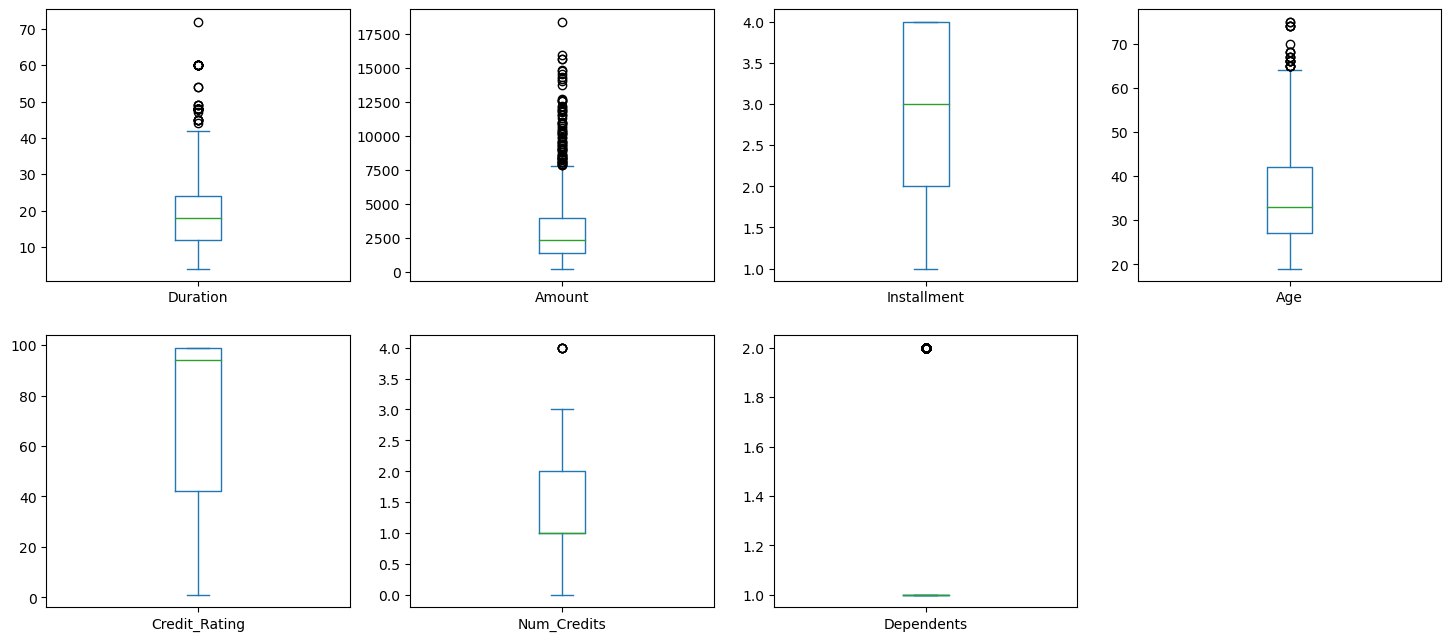

In [38]:
df_numeric.plot(kind='box', subplots=True, layout=(3, 4), figsize=(18, 12))
plt.show()

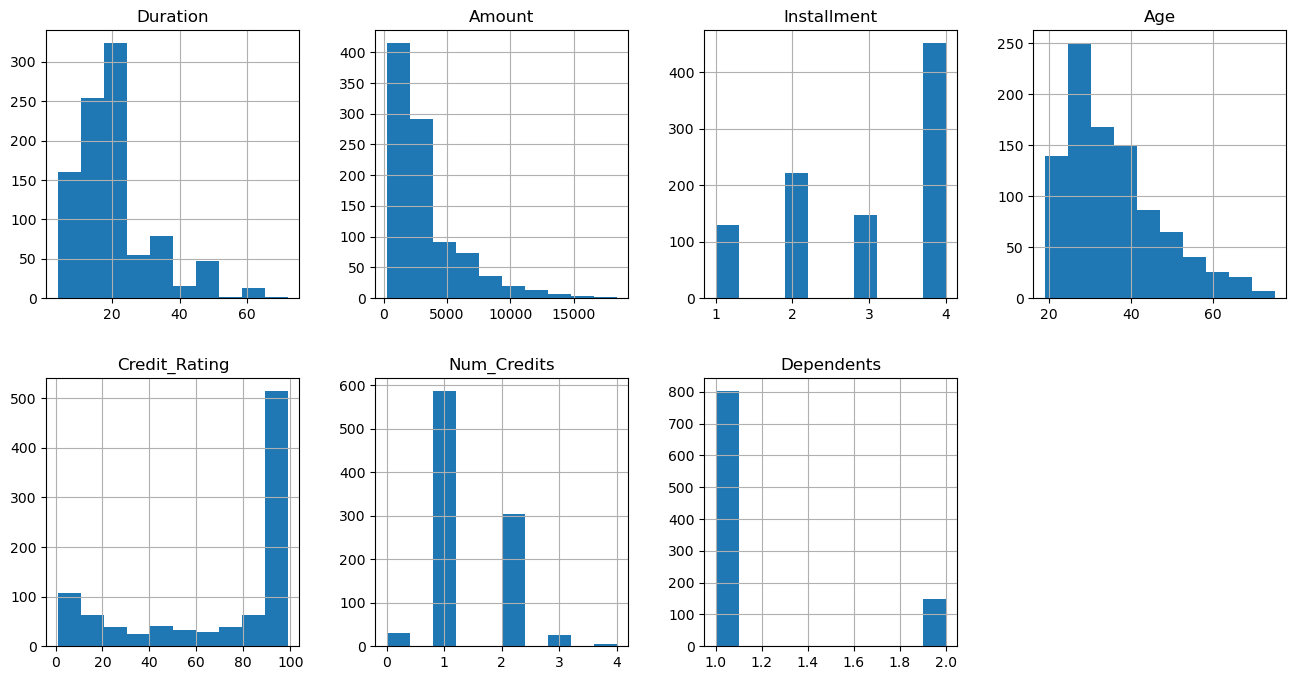

In [39]:
df_numeric.hist(layout=(2,4), figsize=(16,8))
plt.show()

#### Categorical Value Analysis

We first begin by exploring the first column, `ID`

In [40]:
unique_count = df["ID"].nunique()
n_rows, n_cols = df.shape
print(f"# unique PassengerId : {unique_count}")
print(f"# rows : {n_rows}")

# unique PassengerId : 951
# rows : 951


Based on the output above, `ID` simply represents the unique value to for each row, hence we will leave it out of data analysis and visualization since it only serves as a unique identifier and does not influence the outcome of the credit application.

For the rest of the categorical value, we will be showing the frequency as well as the mode together which can help us to have an overview of the frequency of each category based on each column

In [41]:
df_cat = df[["Checking_Account", "Payment_Status", "Purpose", "Savings_Account", "Employment", "Personal_Status", "Guarantors", 
             "Residence_Length", "Assets", "Existing_Credits", "Housing_Type", "Occupation", "Telephone", "Foreign_Worker", "Approval"]]

df_cat.describe().rename({
    'unique':'# of categories',
    'top': 'mode',
    'freq': 'freq of mode'  
})

,Checking_Account,Payment_Status,Purpose,Savings_Account,Employment,Personal_Status,Guarantors,Residence_Length,Assets,Existing_Credits,Housing_Type,Occupation,Telephone,Foreign_Worker,Approval
count,951,951,951,951,951,951,951,951,951,951,951,951,951,951,951
# of categories,4,5,10,5,5,4,3,4,4,3,3,4,2,2,2
mode,4,2,3,1,3,3,1,4,3,3,2,3,1,1,1
freq of mode,372,497,270,570,321,525,861,395,317,773,681,599,569,915,656


### **b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

For each and every categorical variable we will 
- Visualize their distribution using a bar graph
- Label the axis accordingly so we can easily tell which category each bar belongs to

##### 1. `Approval`

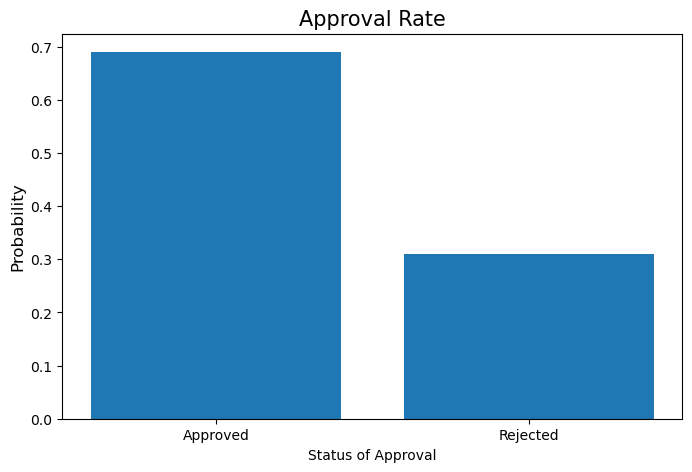

In [42]:
approval_data = df["Approval"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.bar(approval_data.index.map({'0':'Rejected', '1':'Approved'}), approval_data)
plt.title("Approval Rate", fontsize=15)
plt.xlabel("Status of Approval")
plt.ylabel("Probability", fontsize=12)
plt.show()

##### 2. `Checking_Account`

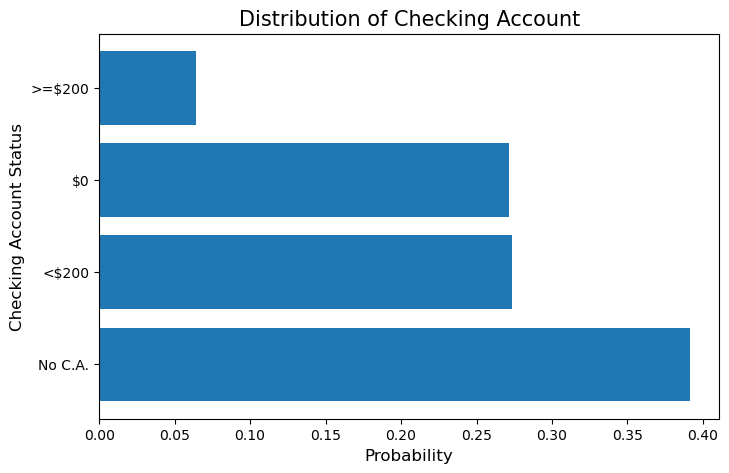

In [43]:
checking_acc_data = df["Checking_Account"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(checking_acc_data.index.map({
    '1':'$0',
    '2':'<$200',
    '3':'>=$200',
    '4':'No C.A.'
}), checking_acc_data)
plt.title("Distribution of Checking Account", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Checking Account Status", fontsize=12)
plt.show()

##### 3. `Payment_Status`

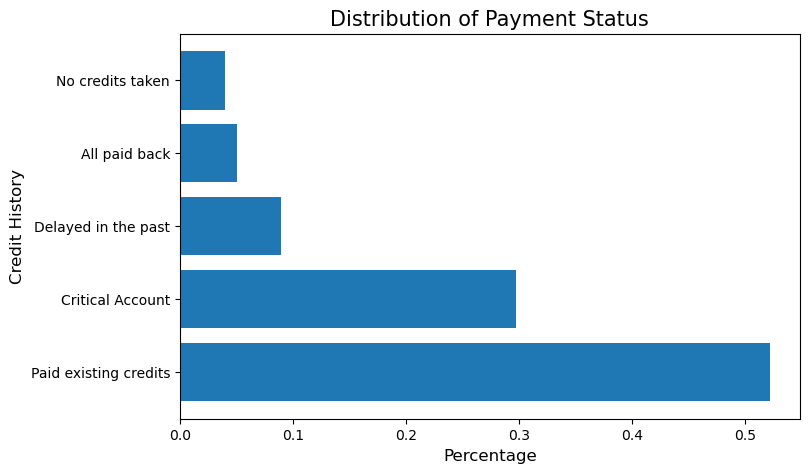

In [44]:
payment_status_data = df["Payment_Status"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(payment_status_data.index.map({
    '0':'No credits taken',
    '1':'All paid back',
    '2':'Paid existing credits',
    '3':'Delayed in the past',
    '4':'Critical Account'
}), payment_status_data)
plt.title("Distribution of Payment Status", fontsize=15)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Credit History", fontsize=12)
plt.show()

##### 4. `Purpose`

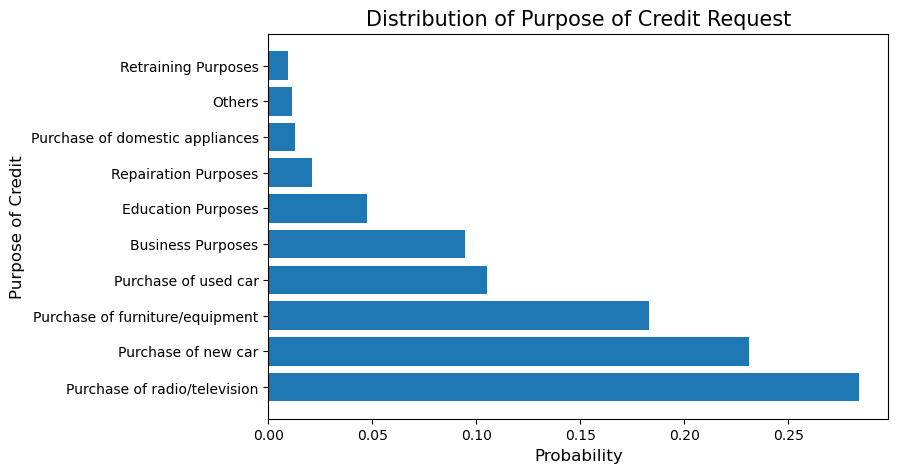

In [45]:
purpose_data = df["Purpose"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(purpose_data.index.map({
    '0':'Purchase of new car',
    '1':'Purchase of used car',
    '2':'Purchase of furniture/equipment',
    '3':'Purchase of radio/television',
    '4':'Purchase of domestic appliances',
    '5':'Repairation Purposes',
    '6':'Education Purposes',
    '7':'Vacation Purposes',
    '8':'Retraining Purposes',
    '9':'Business Purposes',
    '10':'Others',
}), purpose_data)
plt.title("Distribution of Purpose of Credit Request", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Purpose of Credit", fontsize=12)
plt.show()

##### 5. `Savings_Account`

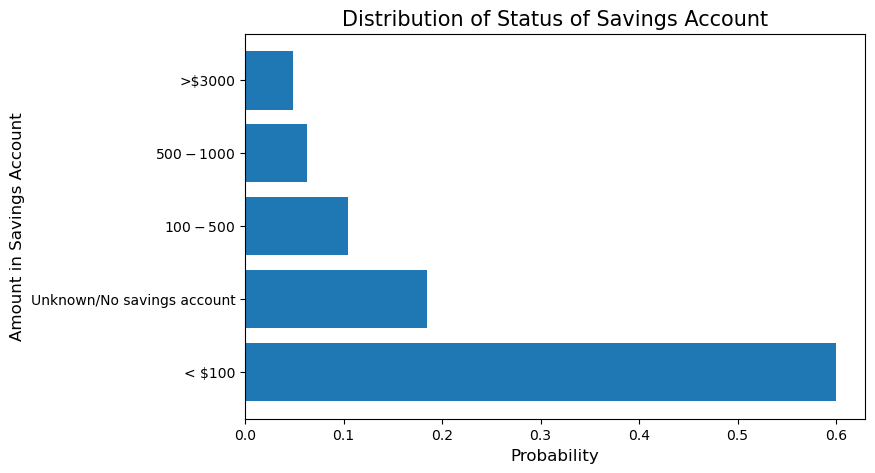

In [46]:
savings_account_data = df["Savings_Account"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(savings_account_data.index.map({
    '1':'< $100',
    '2':'$100 - $500',
    '3':'$500 - $1000',
    '4':'>$3000',
    '5':'Unknown/No savings account',
}), savings_account_data)
plt.title("Distribution of Status of Savings Account", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Amount in Savings Account", fontsize=12)
plt.show()

##### 6. `Employment`

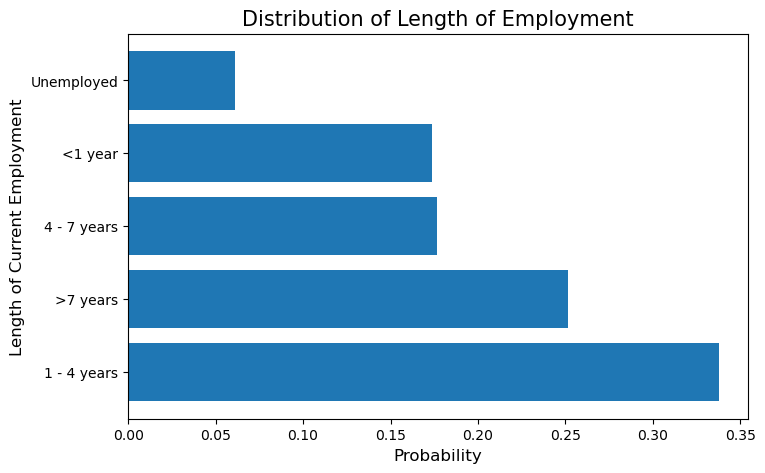

In [47]:
employment_data = df["Employment"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(employment_data.index.map({
    '1':'Unemployed',
    '2':'<1 year',
    '3':'1 - 4 years',
    '4':'4 - 7 years',
    '5':'>7 years',
}), employment_data)
plt.title("Distribution of Length of Employment", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Length of Current Employment", fontsize=12)
plt.show()

##### 7. `Personal_Status`

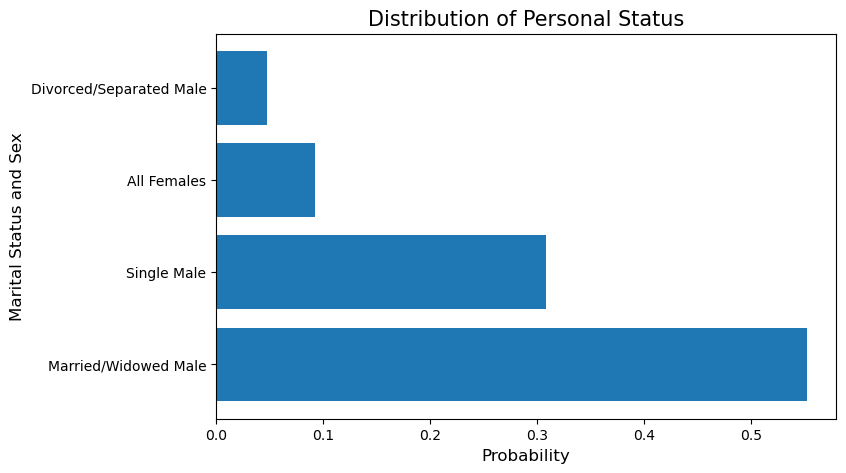

In [48]:
personal_status_data = df["Personal_Status"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(personal_status_data.index.map({
    '1':'Divorced/Separated Male',
    '2':'Single Male',
    '3':'Married/Widowed Male',
    '4':'All Females'
}), personal_status_data)
plt.title("Distribution of Personal Status", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Marital Status and Sex", fontsize=12)
plt.show()

##### 8. `Guarantors`

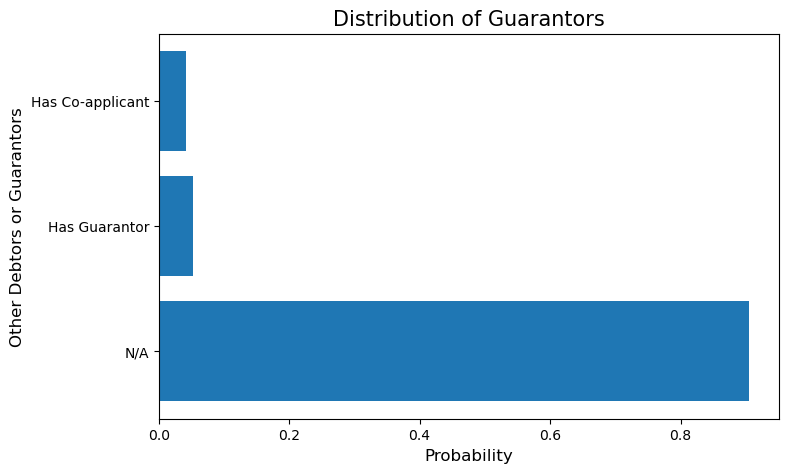

In [49]:
guarantors_data = df["Guarantors"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(guarantors_data.index.map({
    '1':'N/A',
    '2':'Has Co-applicant',
    '3':'Has Guarantor'
}), guarantors_data)
plt.title("Distribution of Guarantors", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Other Debtors or Guarantors", fontsize=12)
plt.show()

##### 9. `Residence_Length`

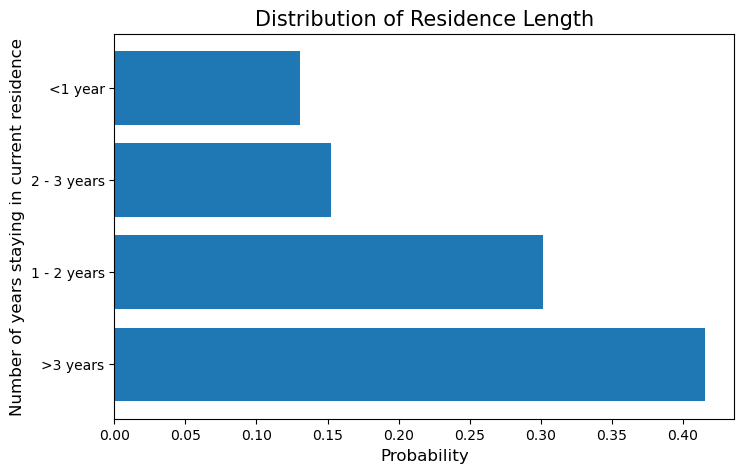

In [50]:
residence_length_data = df["Residence_Length"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(residence_length_data.index.map({
    '1':'<1 year',
    '2':'1 - 2 years',
    '3':'2 - 3 years',
    '4':'>3 years'
}), residence_length_data)
plt.title("Distribution of Residence Length", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Number of years staying in current residence", fontsize=12)
plt.show()

##### 10. `Assets`

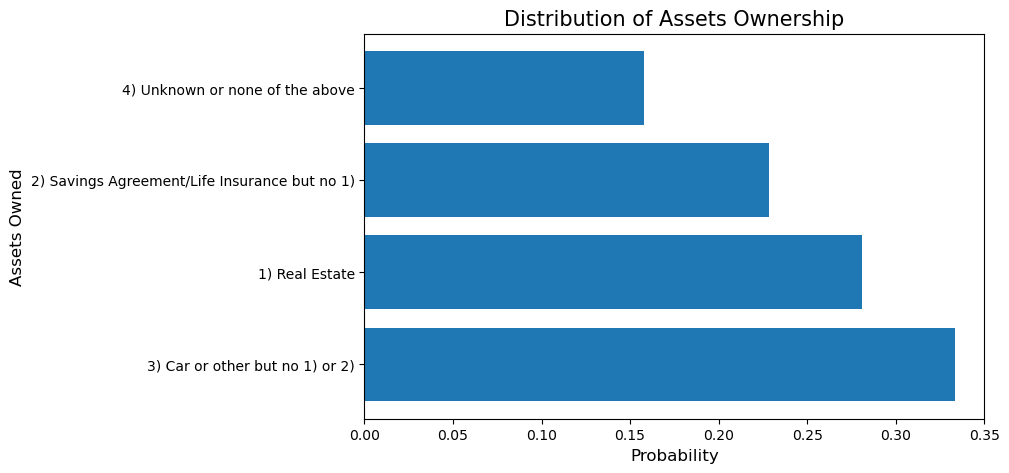

In [51]:
assets_data = df["Assets"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(assets_data.index.map({
    '1':'1) Real Estate',
    '2':'2) Savings Agreement/Life Insurance but no 1)',
    '3':'3) Car or other but no 1) or 2)',
    '4':'4) Unknown or none of the above'
}), assets_data)
plt.title("Distribution of Assets Ownership", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Assets Owned", fontsize=12)
plt.show()

##### 11. `Existing_Credits`

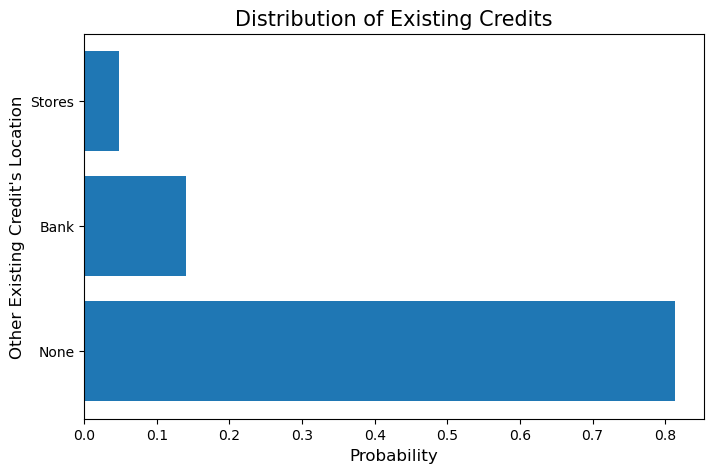

In [52]:
existing_credits_data = df["Existing_Credits"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(existing_credits_data.index.map({
    '1':'Bank',
    '2':'Stores',
    '3':'None'
}), existing_credits_data)
plt.title("Distribution of Existing Credits", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Other Existing Credit's Location", fontsize=12)
plt.show()

##### 12. `Housing_Type`

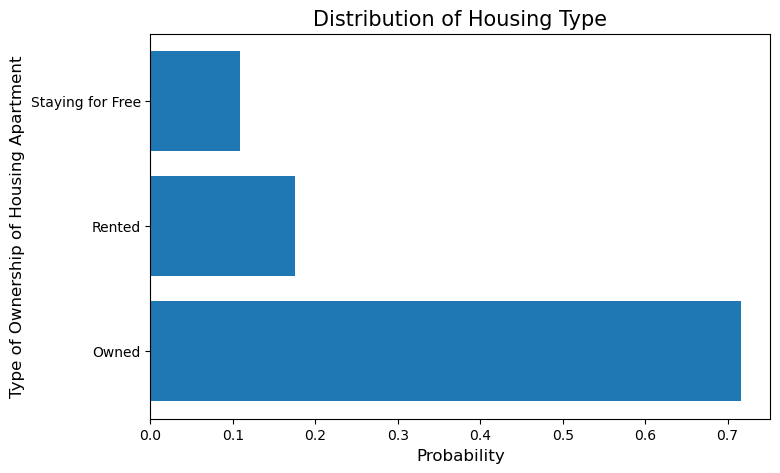

In [53]:
housing_type_data = df["Housing_Type"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(housing_type_data.index.map({
    '1':'Rented',
    '2':'Owned',
    '3':'Staying for Free'
}), housing_type_data)
plt.title("Distribution of Housing Type", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Type of Ownership of Housing Apartment", fontsize=12)
plt.show()

##### 13. `Occupation`

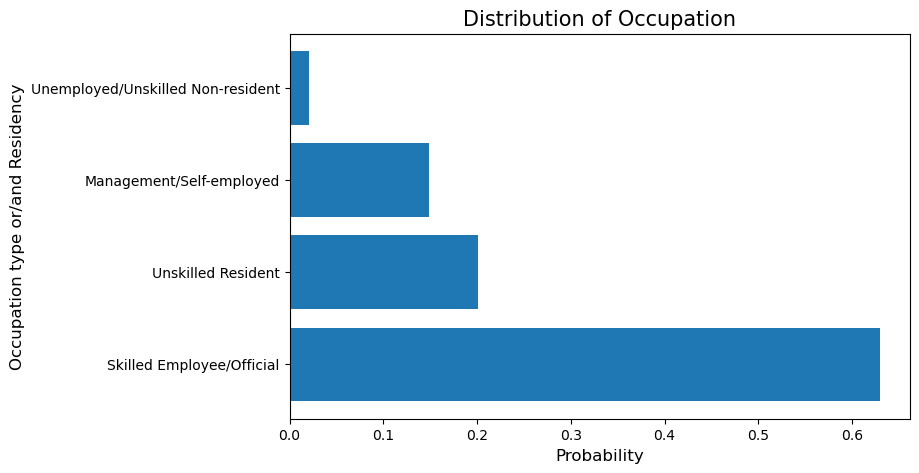

In [54]:
occupation_data = df["Occupation"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(occupation_data.index.map({
    '1':'Unemployed/Unskilled Non-resident',
    '2':'Unskilled Resident',
    '3':'Skilled Employee/Official',
    '4':'Management/Self-employed'
}), occupation_data)
plt.title("Distribution of Occupation", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Occupation type or/and Residency", fontsize=12)
plt.show()

##### 14. `Telephone`

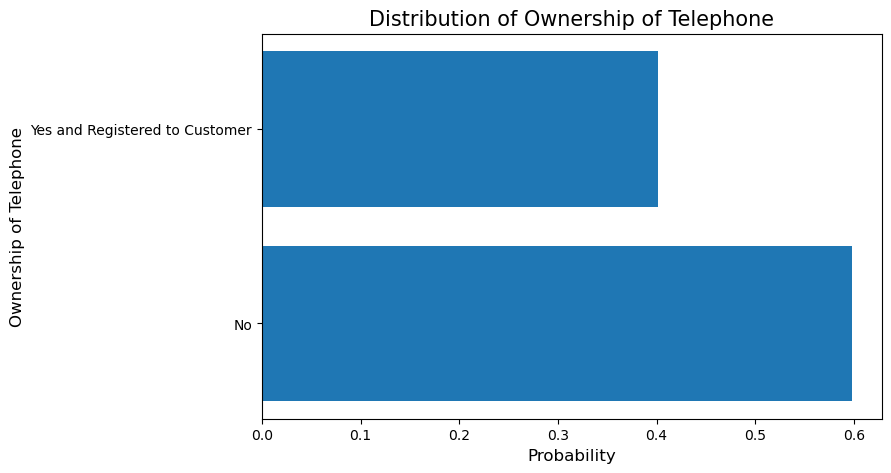

In [55]:
telephone_data = df["Telephone"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(telephone_data.index.map({
    '1':'No',
    '2':'Yes and Registered to Customer'
}), telephone_data)
plt.title("Distribution of Ownership of Telephone", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Ownership of Telephone", fontsize=12)
plt.show()

##### 15. `Foreign_Worker`

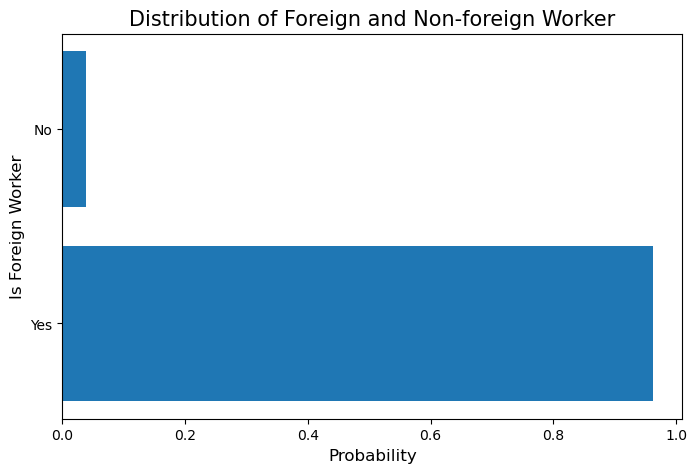

In [56]:
foreign_worker_data = df["Foreign_Worker"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(foreign_worker_data.index.map({
    '1':'Yes',
    '2':'No'
}), foreign_worker_data)
plt.title("Distribution of Foreign and Non-foreign Worker", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Is Foreign Worker", fontsize=12)
plt.show()

Finally, we will proceed to visualize the numerical datatypes. To visualize them, we will
- Split them into 2 piles, one are the rows where `Approval` is set to '1' whereas the rest are the rows where `Approval` is '0'
- We use `describe()` to view their count, mean, standard deviation, min. max. value and their each quarter's percentiles
- Plot a histogram to view their distribution to visualize if they skew differently and look for further insights if any

In [57]:
df_A = df[df["Approval"] == "1"]
df_NA = df[df["Approval"] == "0"]

#### Analysis by grouping datapoint that are 'Approved' and 'Not Approved'

##### 1. Approved Applicant - Numeric

In [58]:
df_A.describe()

,Duration,Amount,Installment,Age,Credit_Rating,Num_Credits,Dependents
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,19.307927,3009.166159,2.923780,36.207317,88.303354,1.359756,1.157012
std,11.095133,2387.011510,1.132577,11.400938,19.440912,0.626510,0.364090
min,4.000000,250.000000,1.000000,19.000000,5.000000,0.000000,1.000000
25%,12.000000,1380.750000,2.000000,27.000000,87.750000,1.000000,1.000000
50%,18.000000,2248.000000,3.000000,34.000000,98.000000,1.000000,1.000000
75%,24.000000,3650.250000,4.000000,42.000000,99.000000,2.000000,1.000000
max,60.000000,15653.000000,4.000000,75.000000,99.000000,4.000000,2.000000


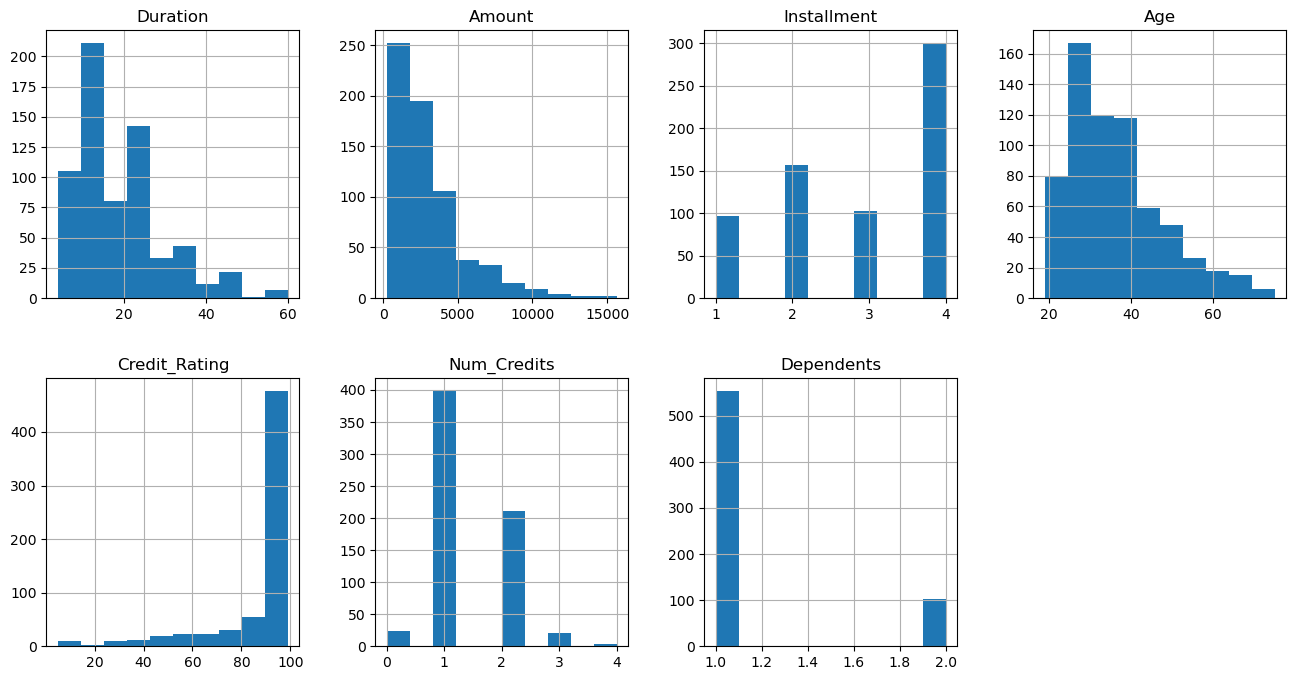

In [59]:
df_numericA = df_A[["Duration", "Amount", "Installment", "Age", "Credit_Rating", "Num_Credits", "Dependents"]]
df_numericA.hist(layout=(2,4), figsize=(16,8))
plt.show()

##### 2. Not Approved Applicant - Numeric

In [60]:
df_NA.describe()

,Duration,Amount,Installment,Age,Credit_Rating,Num_Credits,Dependents
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,24.125424,3821.193220,3.067797,34.349153,31.745763,1.352542,1.155932
std,13.029057,3384.047473,1.088974,11.418007,32.000953,0.587094,0.363408
min,6.000000,409.000000,1.000000,19.000000,1.000000,0.000000,1.000000
25%,12.000000,1368.500000,2.000000,25.500000,8.000000,1.000000,1.000000
50%,24.000000,2580.000000,4.000000,31.000000,18.000000,1.000000,1.000000
75%,30.000000,4857.000000,4.000000,41.000000,45.500000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,74.000000,99.000000,4.000000,2.000000


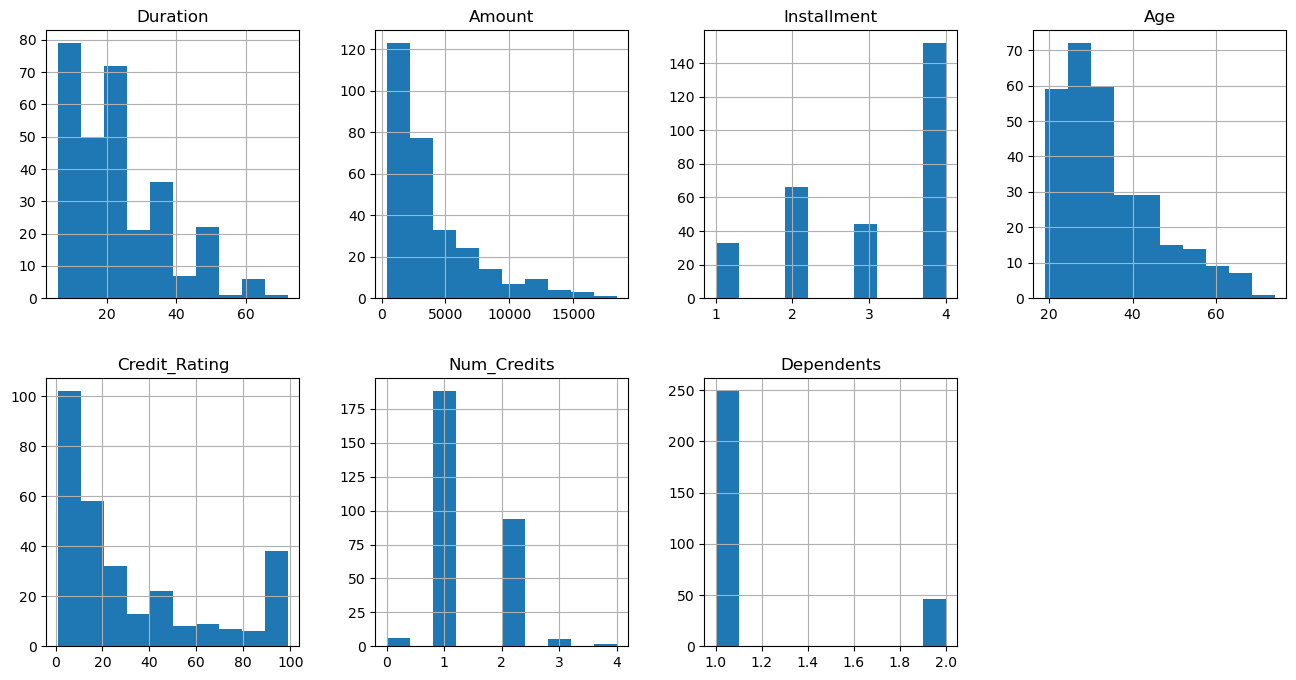

In [61]:
df_numericNA = df_NA[["Duration", "Amount", "Installment", "Age", "Credit_Rating", "Num_Credits", "Dependents"]]
df_numericNA.hist(layout=(2,4), figsize=(16,8))
plt.show()

Based on the observations above, the one column that was the most significant to decide whether a loan is approved or rejected is `Credit_Rating`. We can see that for all approved credits, the `Credit_Rating` is heavily skewed to the right (indicating high `Credit_Rating` is necessary in order to have their loans approved but not the deciding factor)

To further prove our observations to be true, we set a benchmark: 90%, and see how many credit applications are accepted and rejected if they are equal or above the benchmark.

In [62]:
print(f"Number of rows for rejected loan: {df_NA.shape[0]}")

temp = df_NA[df_NA["Credit_Rating"] >= 90]
print(f"Number of rows for rejected loan with >=90 credit rating: {temp.shape[0]}")
percentage = temp.shape[0]/df_NA.shape[0]
print(f"percentage of rows for rejected loan with >=90 credit rating: {percentage}")

temp = df_A[df_A["Credit_Rating"] >= 90]
print(f"Number of rows for approved loan with >=90 credit rating: {temp.shape[0]}")
percentage = temp.shape[0]/df_A.shape[0]
print(f"percentage of rows for approved loan with >=90 credit rating: {percentage}")

temp = df_numeric[df["Credit_Rating"] >= 90]
print(f"Number of rows for with >= 90 credit score: {temp.shape[0]}")
percentage = temp.shape[0]/df_numeric.shape[0]
print(f"Number of rows for with >= 90 credit score: {percentage}")


Number of rows for rejected loan: 295
Number of rows for rejected loan with >=90 credit rating: 38
percentage of rows for rejected loan with >=90 credit rating: 0.1288135593220339
Number of rows for approved loan with >=90 credit rating: 476
percentage of rows for approved loan with >=90 credit rating: 0.725609756097561
Number of rows for with >= 90 credit score: 514
Number of rows for with >= 90 credit score: 0.5404837013669821


We can see that having at lest 90 `Credit_Rating` does not guarantee approval (with more than 10% of applicant getting rejected with >90 Credit rating) but it's necessary to get a good chance of approval

In [63]:
df_catA = df_A[["Checking_Account", "Payment_Status", "Purpose", "Savings_Account", "Employment", "Personal_Status", "Guarantors", 
             "Residence_Length", "Assets", "Existing_Credits", "Housing_Type", "Occupation", "Telephone", "Foreign_Worker", "Approval"]]
df_catNA = df_NA[["Checking_Account", "Payment_Status", "Purpose", "Savings_Account", "Employment", "Personal_Status", "Guarantors", 
             "Residence_Length", "Assets", "Existing_Credits", "Housing_Type", "Occupation", "Telephone", "Foreign_Worker", "Approval"]]

We then proceed to see if there are any co-relation for that for the categorical variables

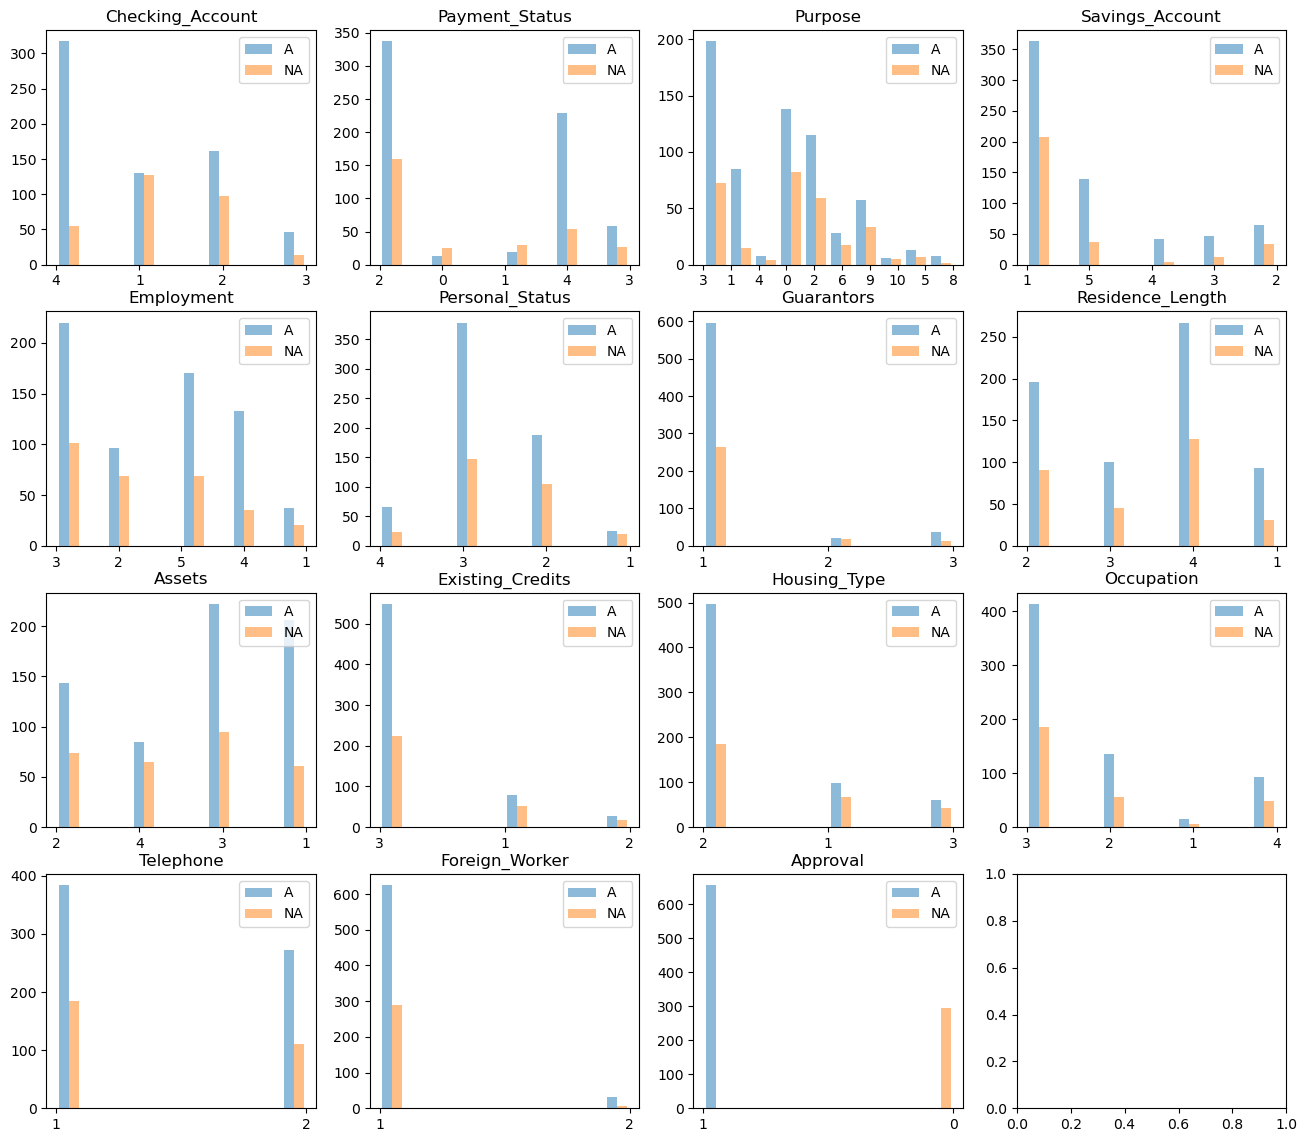

In [64]:
columns = ["Checking_Account", "Payment_Status", "Purpose", "Savings_Account", "Employment", "Personal_Status", "Guarantors", 
             "Residence_Length", "Assets", "Existing_Credits", "Housing_Type", "Occupation", "Telephone", "Foreign_Worker", "Approval"]

fig, axs = plt.subplots(4, 4, figsize=(16,14))

index = 0

for row in range(4):
    finished = False
    for col in range(4):
        col_name = columns[index]
        axs[row, col].set_title(col_name)
        axs[row, col].hist([df_catA[col_name], df_catNA[col_name]], alpha=0.5, label=['A', 'NA'])
        axs[row, col].legend(loc='upper right')
        index += 1
        if index == 15:
            finished = True
            break
    if finished:
        break

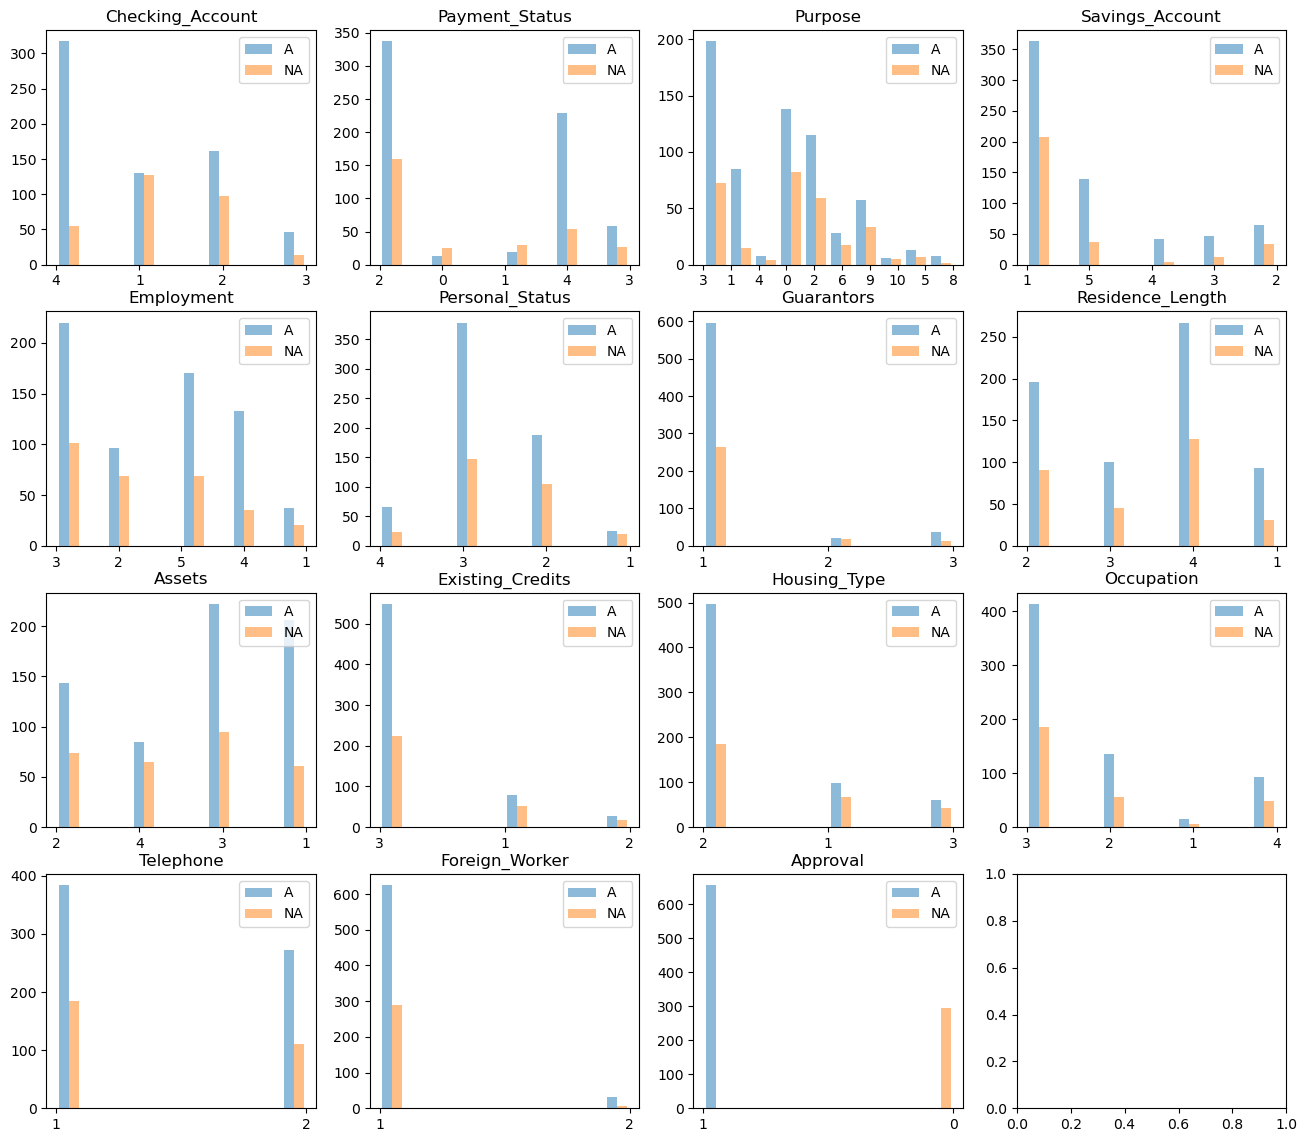

In [65]:
columns = ["Checking_Account", "Payment_Status", "Purpose", "Savings_Account", "Employment", "Personal_Status", "Guarantors", 
             "Residence_Length", "Assets", "Existing_Credits", "Housing_Type", "Occupation", "Telephone", "Foreign_Worker", "Approval"]

fig, axs = plt.subplots(4, 4, figsize=(16,14))

index = 0

for row in range(4):
    finished = False
    for col in range(4):
        col_name = columns[index]
        axs[row, col].set_title(col_name)
        axs[row, col].hist([df_catA[col_name], df_catNA[col_name]], alpha=0.5, label=['A', 'NA'])
        axs[row, col].legend(loc='upper right')
        index += 1
        if index == 15:
            finished = True
            break
    if finished:
        break

Based on all the visualizations above, we have come out with the following conclusion

#### Conclusion

Key points:
- 25th percentile for credit rating of those people who were approved has 88 out of 100 credit rating
- but having high credit rating does not guarantee approval as shown (with around 13% of the people who are rejected has >=90 credit rating)
- more than 25% of the applicants are applying loan for television/radio
- more than 20% of the applicants are applying loan for new car
- more than 10% of the applicants are applying loan for used car
- hence buying of car has the highest percentage of applicant
- 75th percentile for loan amount $3949

profile of applicant:
- more than 90% of applicant are foreign worker
- more than 50% of applicant has been through marriage, male
- at least 70% are skilled workers
- at least 54% of applicats have >= 90 credit rating
- at least 80% of the applicants does not have existing credits in other place

### **c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

Before we perform bi-variate analysis on the variables, we first determine which pairs we want to focus on. We do so via a correlation matrix.

<AxesSubplot: >

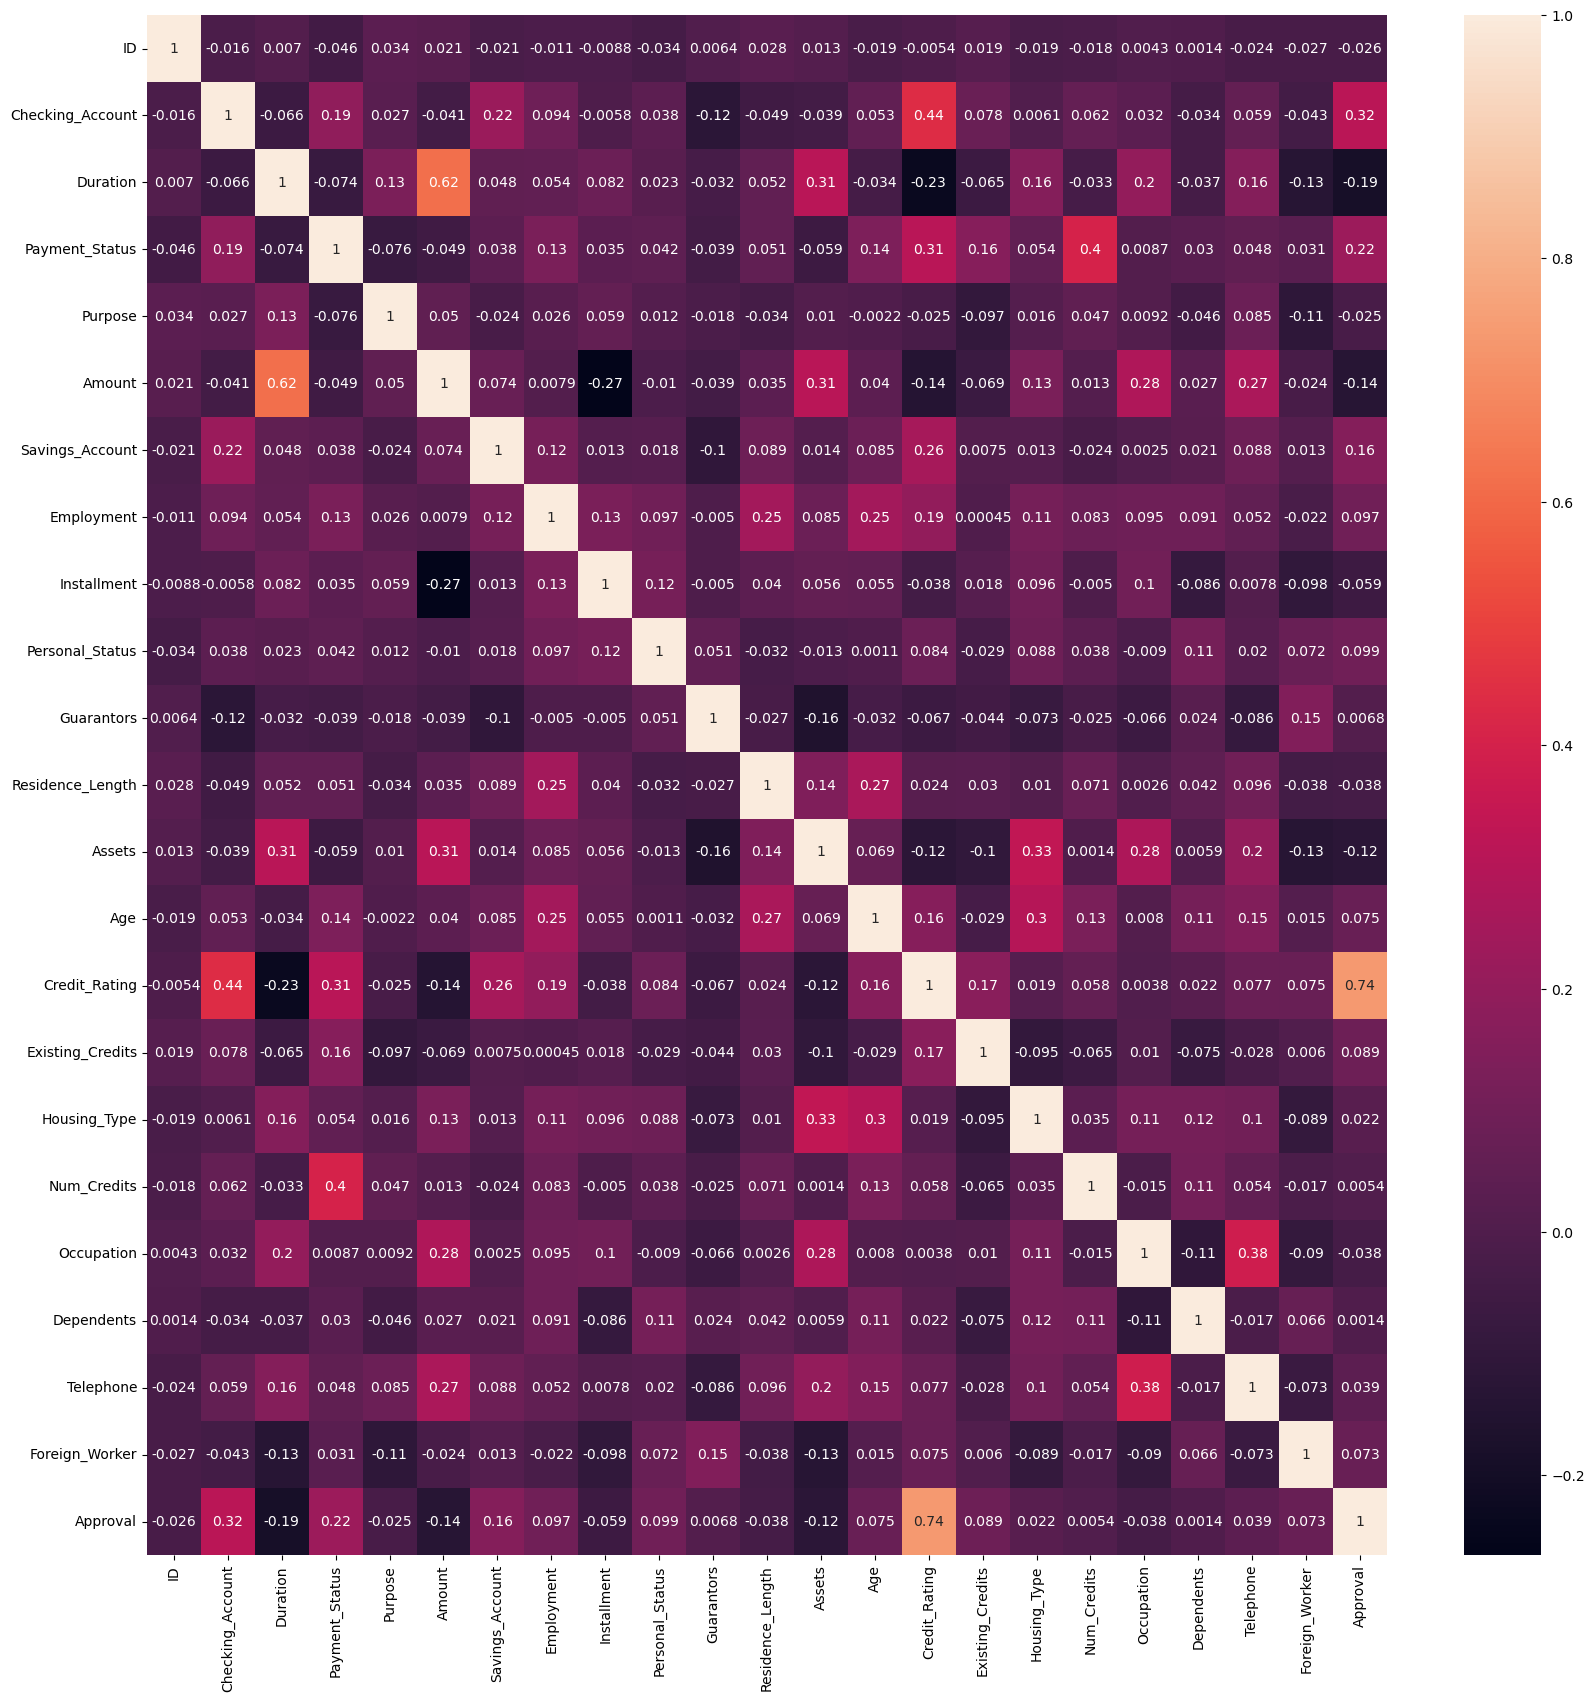

In [66]:
corr = original_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

#### Correlation Matrix Breakdown
It appears that there are 2 sets of features that are very closely positively correlated, being
- Duration & Amount
- Credit_Rating & Approval

For the latter, it makes quite a lot of sense. The more credit rating someone has, the more likely they would be to be approved, since the risk of them defaulting on the loan would be much lower.

For the former, it would seem that the longer the Duration of the loan, the bigger the amount of the loan tends to be. This again, would make sense. For bigger loans, people would usually take the loan over a longer period so that they would have more time to pay it back.

Let us take a look at the top 10 correlation values to see if there are other notable correlations.

In [67]:
sorted_corr = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
sorted_corr[:10]

ID                ID                  1.000000
Approval          Credit_Rating       0.736639
Duration          Amount              0.617604
Checking_Account  Credit_Rating       0.439057
Num_Credits       Payment_Status      0.402495
Telephone         Occupation          0.379192
Assets            Housing_Type        0.333444
Approval          Checking_Account    0.315164
Amount            Assets              0.312070
Assets            Duration            0.311478
dtype: float64

There doesn't seem to be any other significant pairs with correlation greater than 0.5, although Checking_Account & Credit_Rating, Num_Credits & Payment_Status could be potentially useful too. However, let us focus on the most significant 2 for now.

#### Credit_Rating & Approval

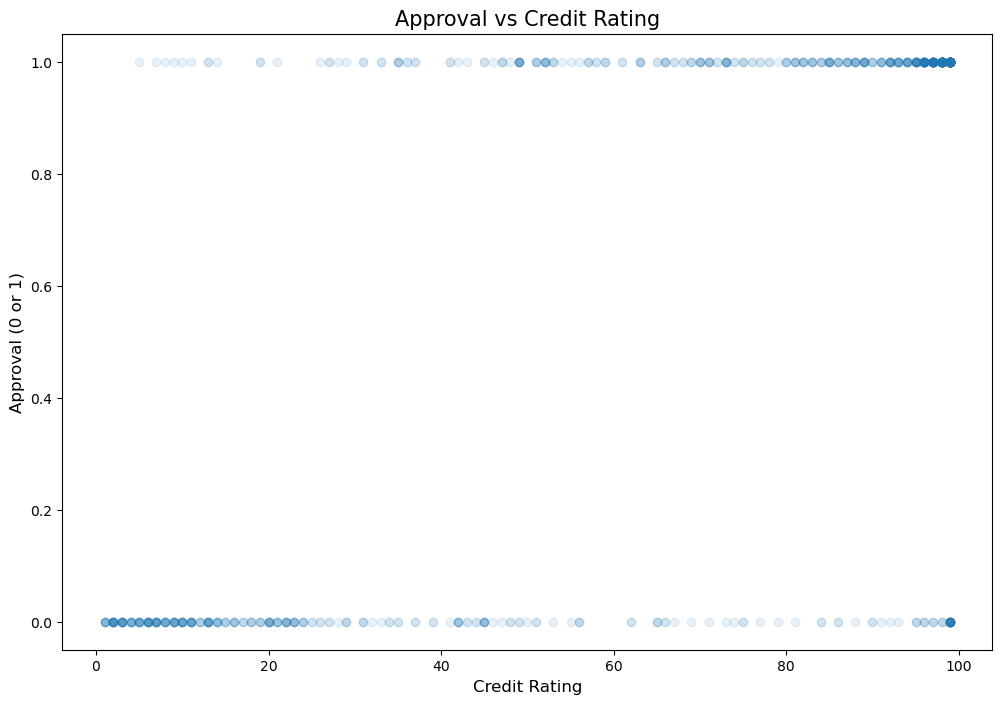

In [68]:
xs = original_df['Credit_Rating']
ys = original_df['Approval']

plt.figure(figsize=(12,8))
plt.scatter(xs, ys, alpha=0.1)
plt.title("Approval vs Credit Rating", fontsize=15)
plt.xlabel("Credit Rating", fontsize=12)
plt.ylabel("Approval (0 or 1)", fontsize=12)
plt.show()

We can see that as the credit rating increases, the prevalence of approved loans increases. Having high credit rating does not guarantee approval, but from this we can see that a higher credit rating does indeed mean a higher likelihood for approval.

#### Duration & Amount

<AxesSubplot: xlabel='Duration', ylabel='Amount'>

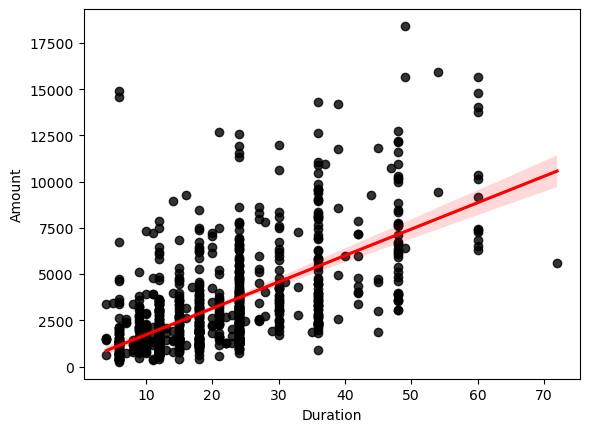

In [69]:
duration = original_df["Duration"]
amount = original_df["Amount"]

sns.regplot(x=duration, y=amount, scatter_kws={"color": "black"}, line_kws={"color": "red"})

We can see that there is indeed a positive correlation between duration and amount, although it does not seem to fit the best fit line that well. It just seems that the higher the amount, the higher the likelihood of the duration being higher as well.

#### Surprising Correlations

In [70]:
sorted_corr[-10:]

ID               Occupation          0.004323
Credit_Rating    Occupation          0.003788
Occupation       Residence_Length    0.002562
                 Savings_Account     0.002457
Purpose          Age                 0.002177
Num_Credits      Assets              0.001412
Dependents       Approval            0.001374
ID               Dependents          0.001370
Personal_Status  Age                 0.001063
Employment       Existing_Credits    0.000449
dtype: float64

Surprisingly, it would seem that the correlation between Guarantors & Approval is very low. This seems to go against our expectations. If a person has guarantors, it would mean that the loan would be covered by the guarantor in the event the person defaults on the loan, which should mean that the risk to the bank should be lower, making them more likely to approve the loan. Let's take a closer look at the data.

In [71]:
print(f"Total Number of People: {len(original_df['Guarantors'])}")
print(f"Total Number of People with no guarantors: {len(original_df[original_df['Guarantors'] == 1])}")

Total Number of People: 951
Total Number of People with no guarantors: 861


It seems that most people actually have no guarantors at all, which was also established in the earlier part. Let us see if having guarantors really improves your chances of getting your loan approved.

In [72]:
approved_people = original_df[original_df['Approval'] == 1]

# Percentage of people who have guarantors who got their loan approved
has_guarantors_percentage = len(approved_people[approved_people['Guarantors'] > 1]) / len(original_df[original_df['Guarantors'] > 1]) * 100
# Percentage of people who have no guarantors who got their loan approved
no_guarantors_percentage = len(approved_people[approved_people['Guarantors'] == 1]) / len(original_df[original_df['Guarantors'] == 1]) * 100

print(f"Percentage of people who have guarantors/co-applicants that were approved: {has_guarantors_percentage:.2f}%")
print(f"Percentage of people without guarantors/co-applicants that were approved: {no_guarantors_percentage:.2f}%")

Percentage of people who have guarantors/co-applicants that were approved: 66.67%
Percentage of people without guarantors/co-applicants that were approved: 69.22%


It would seem that having guarantors really does not affect your likelihood by much. One reason might be because the credit facility values credit score that much more.

Even if a person has a guarantor but a low credit score, it would mean that there is a higher chance that they would default and a possibility that the guarantor might have difficulties paying the loan back. Conversely, whether a person with a high credit score has a guarantor is not that important because the risk of them defaulting is very low anyway.

Thus, it would seem that this credit facility's main concern is to minimise the risk of clients defaulting, which might explain why the correlation between Guarantor & Approval is so low. Having a Guarantor does not affect the risk of a client defaulting.

Therefore, based the analysis conducted above, the main factor that decides whether a person will have its loan approved or not will still mainly be their credit score.

# Part II: Modeling [12% of final grade]

## 1. Problem formulation [15% of Part II]

### **a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

- Regression: Predict the value of a new applicant's credit rating, given information related to the applicant.
- Classification: Predict whether a new application is approved / rejected, given information related to the applicant.

### **b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

- The classification problem; this model would be helpful to automate applicants to applying for a credit facility.

### **c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

- Approval status of a new application; Filter the applicants based on the approval status

## 2. Model training [30% of Part II]

### **a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

- As mention in part 1 we will be excluding `ID` column in both analysis and training as the column merely represents unique identifier for each column, it does not have any other meaning
- We have also group the fetures into numeric and categorical value as shown below

In [73]:
numeric_col_name = df_numeric.dtypes.index
cat_col_name = df_cat.dtypes.index

print(df_numeric.columns)
print(df_cat.columns)
print(df.shape)

Index(['Duration', 'Amount', 'Installment', 'Age', 'Credit_Rating',
       'Num_Credits', 'Dependents'],
      dtype='object')
Index(['Checking_Account', 'Payment_Status', 'Purpose', 'Savings_Account',
       'Employment', 'Personal_Status', 'Guarantors', 'Residence_Length',
       'Assets', 'Existing_Credits', 'Housing_Type', 'Occupation', 'Telephone',
       'Foreign_Worker', 'Approval'],
      dtype='object')
(951, 23)


#### Categorial Feature Selction

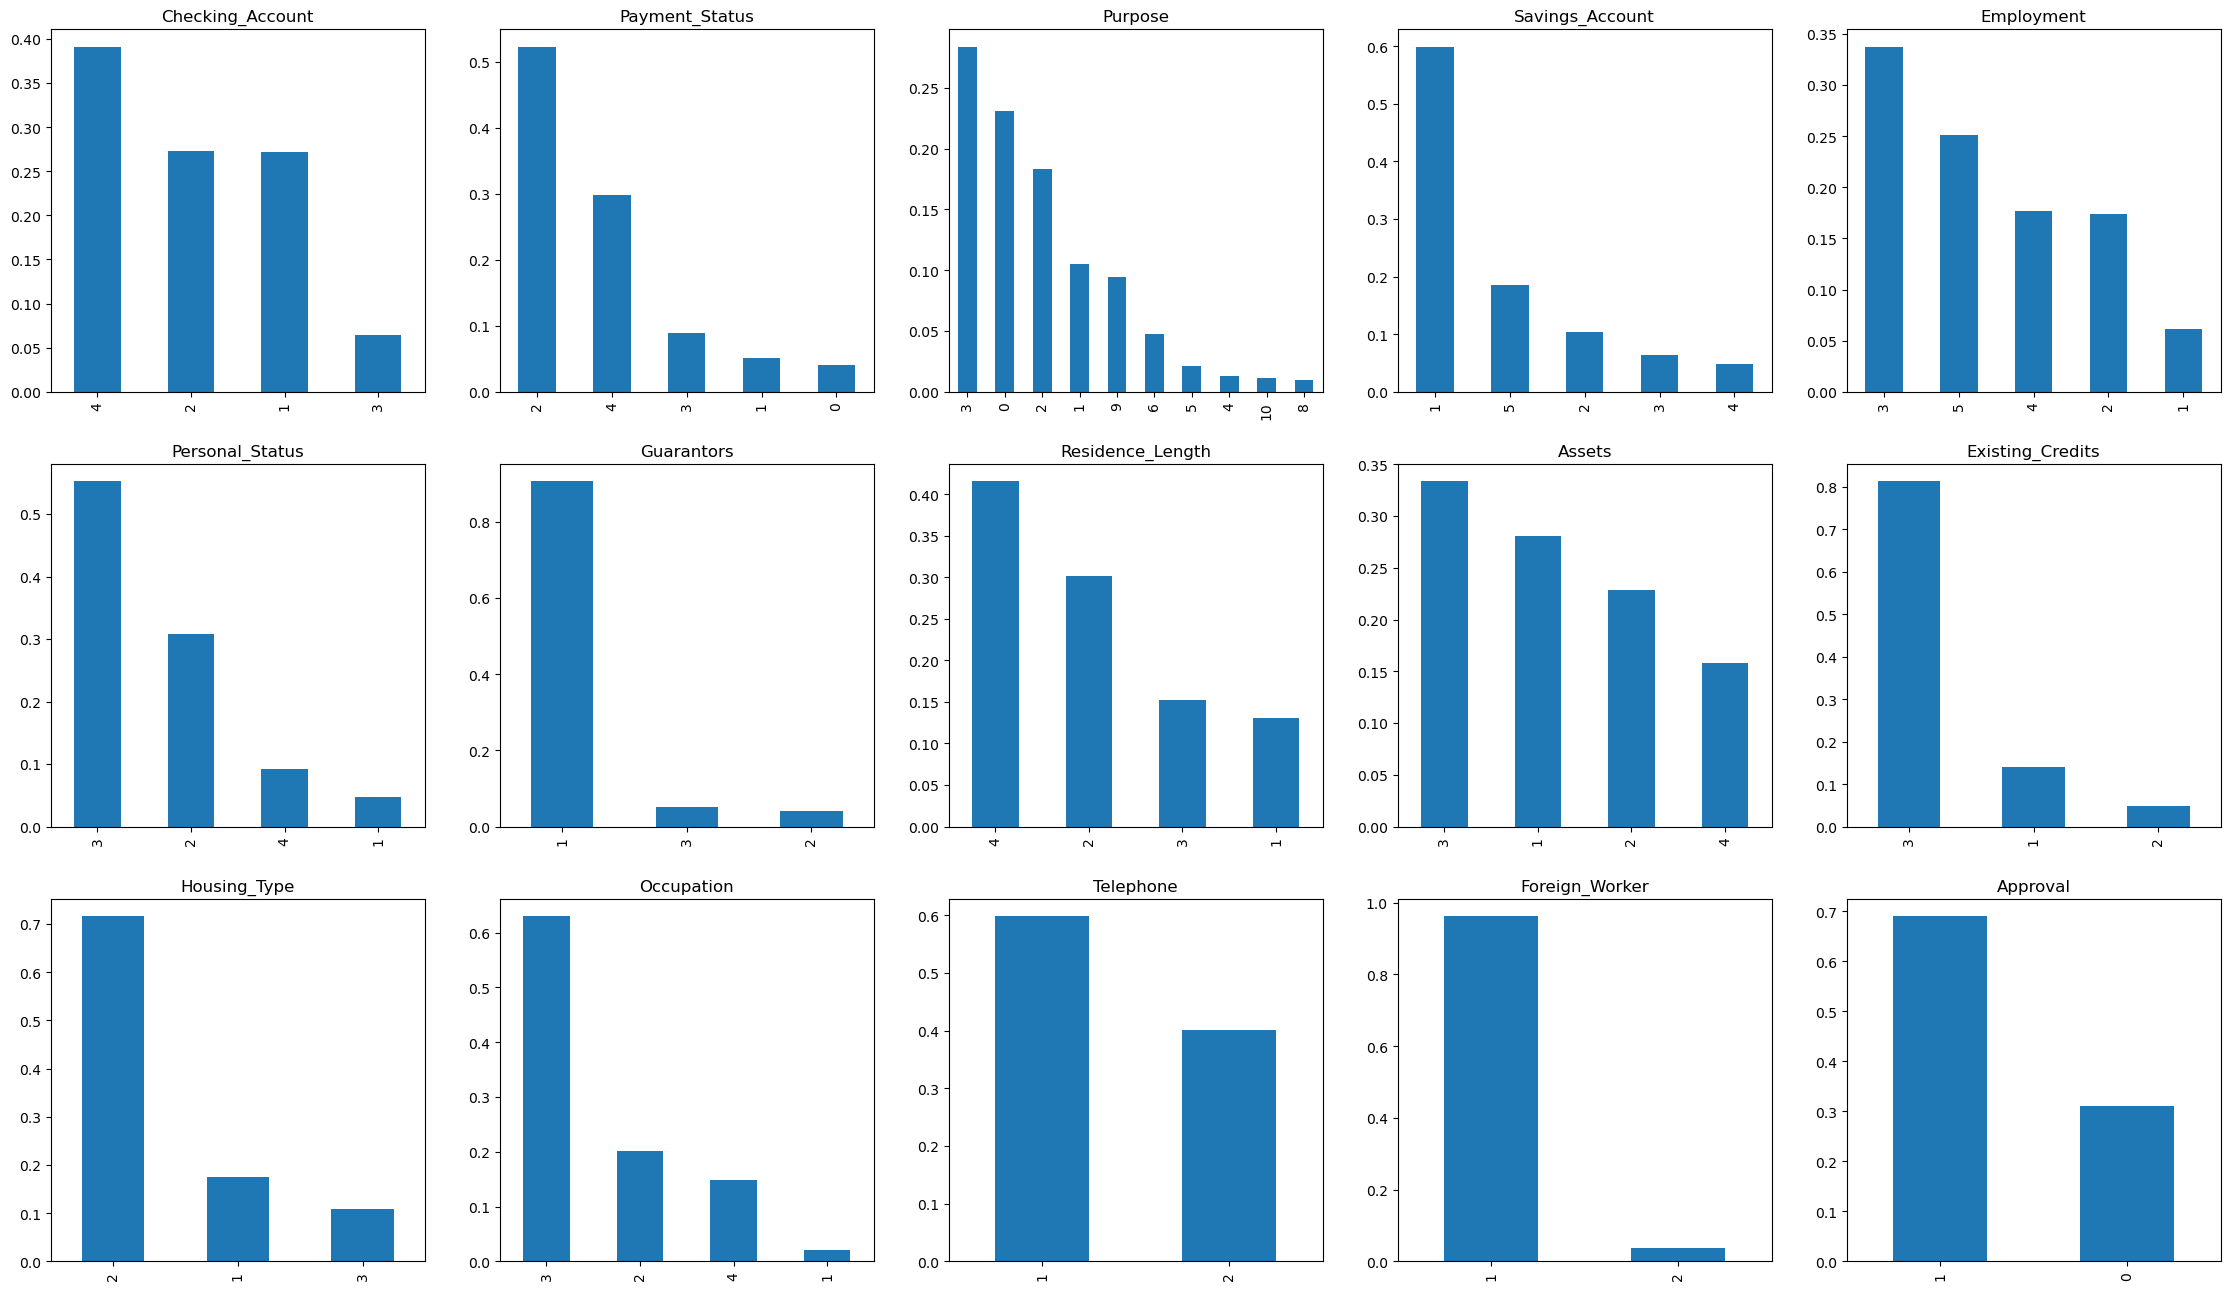

In [74]:
n = len(cat_col_name)

r, c = 3, 5
fig, axs = plt.subplots(r, c, figsize=(28,16))

index = 0

for i in range(n):
    feature = cat_col_name[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    df_cat[feature].value_counts(normalize=True).plot(kind='bar')

plt.show()

In [75]:
cat_selected = []

for feature in cat_col_name:
    highest = df[feature].value_counts(normalize=True)[0]
    if highest<0.55:
        cat_selected.append(feature)

print(f"Variables with mode contributing <55% are : {cat_selected}")

Variables with mode contributing <55% are : ['Checking_Account', 'Payment_Status', 'Purpose', 'Employment', 'Residence_Length', 'Assets']


In [76]:
from scipy.stats import chi2_contingency

rej_null = []
for i in range(len(cat_col_name)-1):
    col = cat_col_name[i]
    print(col.ljust(16), end=': \t')
    crosstab = pd.crosstab(df_cat[col], df_cat["Approval"])
    p = chi2_contingency(crosstab)[1]
    print(p)
    if p < 0.05:
        rej_null.append(col)

print(rej_null)

Checking_Account: 	2.0701614970657263e-20
Payment_Status  : 	2.8352126443173244e-12
Purpose         : 	0.003849886223838589
Savings_Account : 	1.0613960287189776e-05
Employment      : 	0.0010243551303110996
Personal_Status : 	0.01705887553149772
Guarantors      : 	0.08943093045076267
Residence_Length: 	0.4721077130103375
Assets          : 	0.00016248380578771598
Existing_Credits: 	0.017880364972606266
Housing_Type    : 	0.00012494766227856807
Occupation      : 	0.677736819038812
Telephone       : 	0.25285944948446615
Foreign_Worker  : 	0.037371691144441346
['Checking_Account', 'Payment_Status', 'Purpose', 'Savings_Account', 'Employment', 'Personal_Status', 'Assets', 'Existing_Credits', 'Housing_Type', 'Foreign_Worker']


H<sub>0</sub>: Both variables are independent </br>
H<sub>1</sub>: Both variables are dependent

We also use Chi Square Test to see if the features columns are independent with `Approval` column </br>
Above are columns which reject null hypothesis and supports alternative hypothesis that says they are dependent (<0.05 p-value)</br>

The criteria for feature selection are:
1. There is relation between feature and `Approval` column
2. There are enough data for the selected feature
3. There is some form of variation in order to have explanatory power (flexible, with support from part 1 analysis by grouping data into "Approved" and "Not Approved")

In [77]:
num_foreign = df[df['Foreign_Worker'] == "1"].shape[0]
num_nonforeign = df[df['Foreign_Worker'] == "2"].shape[0]

print(f"# of foreign worker: {num_foreign}")
print(f"# of non-foreign worker: {num_nonforeign}")

# of foreign worker: 915
# of non-foreign worker: 36


- Foreign worker will removed as there is not enough data for non-foreign worker to support any conclusion

Together with the visualiztion done in part one, the features we are including are: </br>

In [78]:
cat_selected = ['Checking_Account', 'Payment_Status', 'Purpose', 'Employment', 'Assets']

- `Housing_Type`, `Existing_Credits`, `Savings_Account`, `Personal_Status` features will be removed due to the lack of variation, hence little explanatory power

#### Numeric Feature Selction

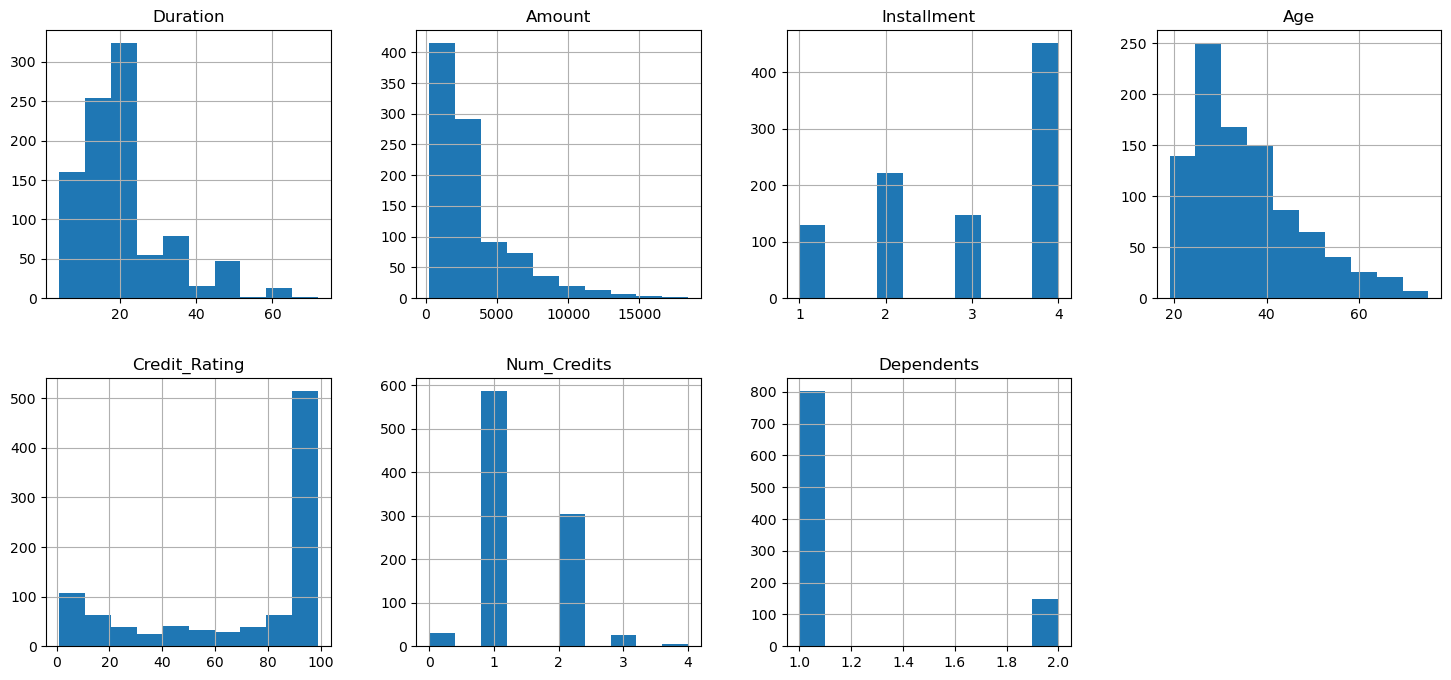

In [79]:
df_numeric.hist(layout=(2,4), figsize=(18,8))

plt.show()

Observation: </br>
- `Dependents` lack in variation, hence will not be included

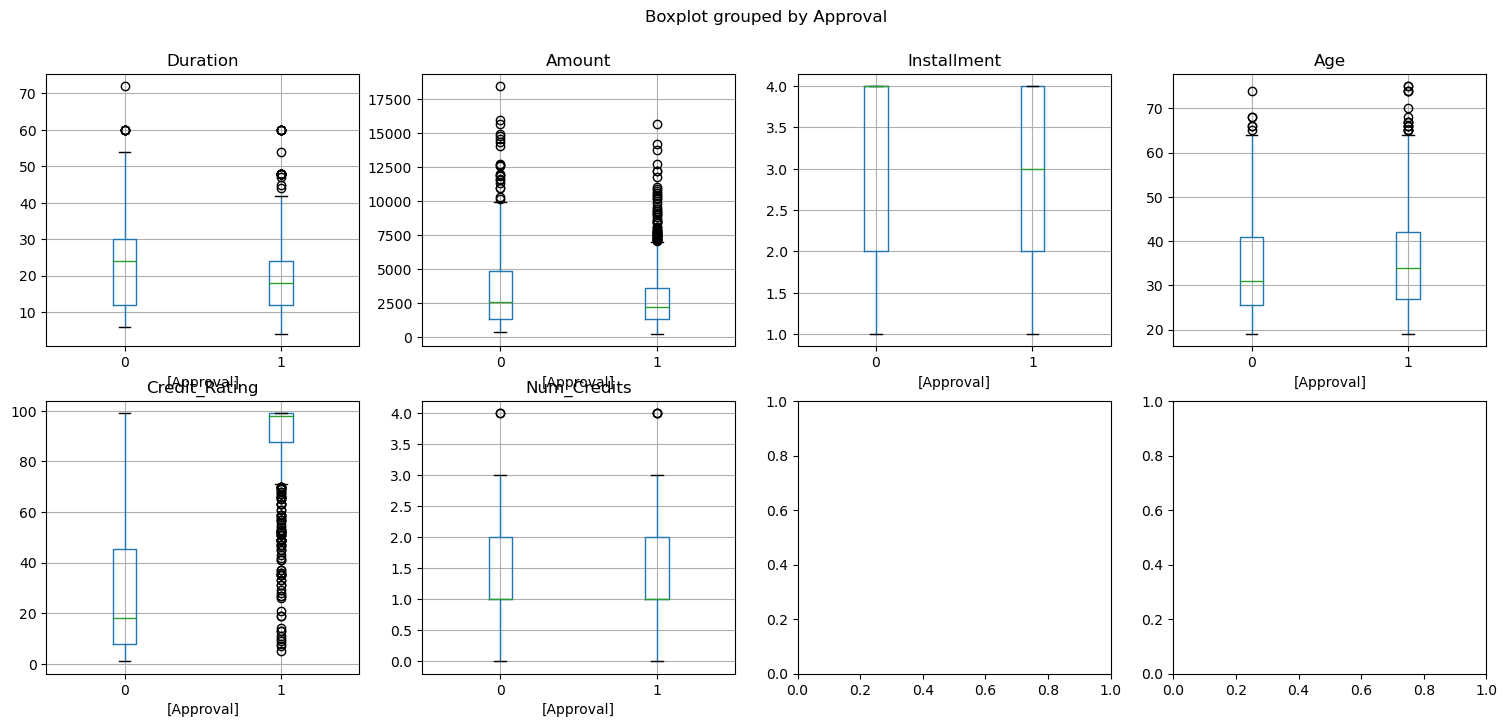

In [80]:
numeric_selected = ['Duration', 'Amount', 'Installment', 'Age', 'Credit_Rating', 'Num_Credits']

n = len(numeric_selected)

r, c = 2, 4
fig, ax = plt.subplots(r, c, figsize=(18,8))

for i in range(n):
    feature = numeric_selected[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    df[['Approval', feature]].boxplot(by='Approval', ax=ax)

plt.show()

We can see that `Age`, `Installment`, `Num_Credits` IQR between 'Approved' and 'Not Approved' applicant have little to no movement hence we will drop features that does not seem to have correlation with the `Approval` dependent variable </br>

Features that are selected are `Duration`, `Amount`, `Credit_Rating`

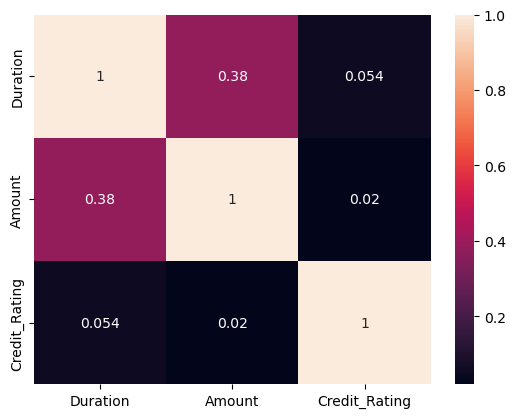

In [81]:
numeric_selected = ['Duration', 'Amount', 'Credit_Rating']

r2 = df_numeric[numeric_selected].corr()**2
sns.heatmap(r2, annot=True)
plt.show()

We can see that amount have slight correlation with duration, we will not remove one of it as the correlation is below our threshold of 0.5

### **b.** Split the dataset into train and test sets. Describe how you split step by step.

First we copy from the dataframe that has performed one hot encoded as well is in a clean state without modifications

In [82]:
df_features = df_encoded.copy()

In [83]:
df_features.columns

Index(['ID', 'Checking_Account', 'Duration', 'Payment_Status', 'Amount',
       'Savings_Account', 'Employment', 'Installment', 'Residence_Length',
       'Assets', 'Age', 'Credit_Rating', 'Housing_Type', 'Num_Credits',
       'Occupation', 'Dependents', 'Telephone', 'Foreign_Worker', 'Approval',
       'EC_2', 'EC_3', 'G_2', 'G_3', 'PS_1', 'PS_2', 'PS_3', 'PS_4', 'P_0',
       'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_8', 'P_9', 'P_10'],
      dtype='object')

In [84]:
df_label = df_features['Approval']
df_label.head()

0    0
1    1
2    1
3    0
4    1
Name: Approval, dtype: int64

In [85]:
print("Categorial columns to be included: ", cat_selected)
print("Numberic columns to be included: ", numeric_selected)

Categorial columns to be included:  ['Checking_Account', 'Payment_Status', 'Purpose', 'Employment', 'Assets']
Numberic columns to be included:  ['Duration', 'Amount', 'Credit_Rating']


Next, we drop the columns that we decided not to be included

In [86]:
df_features = df_features[['Checking_Account', 'Duration', 'Amount', 'Assets', 'Payment_Status', 'Employment', 'Credit_Rating',
                           'P_0','P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_8', 'P_9', 'P_10']]

In [87]:
# Split dataset into 75-25 for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_features, df_label, train_size=0.75, random_state=10)

We split the data into 75-25 for training and testing respectively, which is the usual ratio

### **c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

Random Forest Classifier
- Offers flexibility in terms of tuning
- No assumptions of underlying distribution of the data 
- Outlier does not significantlly impact RFC

Logistic Regression
- Simple and requires minimal tuning
- No assumptions of underlying distribution of the data 
- Benchmark model to compare with other models

### **d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=10, min_samples_leaf=4)
rfc.fit(x_train, y_train)
print(f"Random Forest Training Score: {rfc.score(x_train, y_train)}")
print(f"Random Forest Testing Score: {rfc.score(x_test, y_test)}")

Random Forest Training Score: 0.908835904628331
Random Forest Testing Score: 0.8907563025210085


Parameter Tuning:
- n_estimators: 100 (number of trees to start with)
- min_samples_leaf: 4 (prevent predicting based only few features)

### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=300, random_state=10)
logReg.fit(x_train, y_train)
print(f"Logistic Regression Training Score: {logReg.score(x_train, y_train)}")
print(f"Logistic Regression Testing Score: {logReg.score(x_test, y_test)}")

Logistic Regression Training Score: 0.8877980364656382
Logistic Regression Testing Score: 0.8781512605042017


Parameter Tuning:
- max_iter: 300 to be able to converge
- The rest at kept default as there's no good reason to change it

## 3. Model evaluation and selection [30% of Part II]

### **a.** For each model, predict the response variable on the test set.

##### Random Forest Classifier

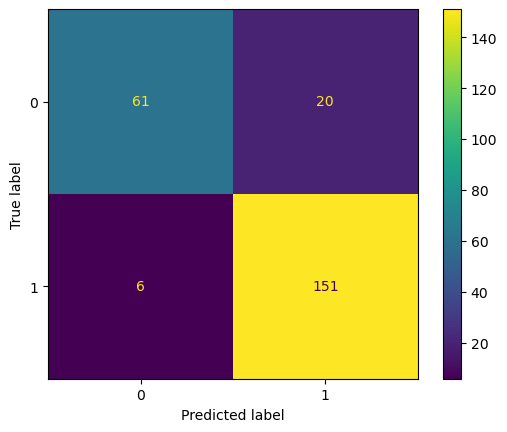

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test_rfc = rfc.predict(x_test)
confusion_matrix(y_test, y_pred_test_rfc)
cm = confusion_matrix(y_test, y_pred_test_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_).plot()

##### Logistic Regression

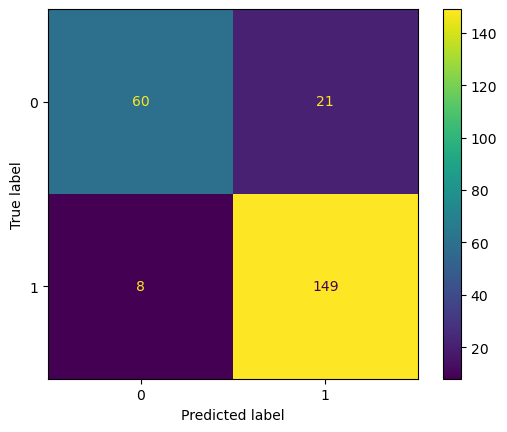

In [91]:
y_pred_test_lr = logReg.predict(x_test)
confusion_matrix(y_test, y_pred_test_lr)
cm = confusion_matrix(y_test, y_pred_test_lr)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logReg.classes_).plot()

### **b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

In [92]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

The main matric we are using is F1 Score as we want to balance both precision and recall. 
- False Positive will place the company at risk due to approval of a risky loan
- False Negative will lead the company to lose potential profit from the loan

In [93]:
acc_test =  accuracy_score(y_test, y_pred_test_rfc)
f1_test = f1_score(y_test, y_pred_test_rfc, average='weighted')

print("Random Forest Classifier Evaluation")
print("---------Train Dataset---------")
print(f"Accuracy: {rfc.score(x_train, y_train):.3f}")

print("---------Test Dataset---------")
print(f"Accuracy: {acc_test:.3f}")
print(f"F1-score: {f1_test:.3f}")

Random Forest Classifier Evaluation
---------Train Dataset---------
Accuracy: 0.909
---------Test Dataset---------
Accuracy: 0.891
F1-score: 0.888


In [94]:
acc_test =  accuracy_score(y_test, y_pred_test_lr)
f1_test = f1_score(y_test, y_pred_test_lr, average='weighted')

print("Logistic Regression Evaluation")
print("---------Train Dataset---------")
print(f"Accuracy: {logReg.score(x_train, y_train):.3f}")

print("---------Test Dataset---------")
print(f"Accuracy: {acc_test:.3f}")
print(f"F1-score: {f1_test:.3f}")

Logistic Regression Evaluation
---------Train Dataset---------
Accuracy: 0.888
---------Test Dataset---------
Accuracy: 0.878
F1-score: 0.875


### **c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

We will be using Random Forest Classifier for this prediciton task as RFC performs bettter with higher F1-score when tuned. There are also no signs of overfitting, the training and testing accuracy is quite similar and balanced

## 4. Findings and conclusion [20% of Part II]

### **a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

**Response.** 

### **b.** Share any lesson you have learned from the project, in **no more than 50 words**.

**Response.** 

## 5. Non-technical protocol [5% of Part II]

### **a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

**Response.** 

### **b.** List any references and sources you have cited.

Chi Square Test </br>
- https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95
- https://pythonfordatascienceorg.wordpress.com/chi-square-python/

Random Forest Classifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.datacamp.com/tutorial/random-forests-classifier-python

Logistic Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://www.datacamp.com/tutorial/understanding-logistic-regression-python